In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# import scipy.stats as stats

In [2]:
df_customer = pd.read_csv('customer.csv')
df_click = pd.read_csv('click_stream.csv')
df_product = pd.read_csv('product.csv', on_bad_lines='skip')
df_trans = pd.read_csv('transactions.csv')

In [3]:
## Use this instead, if you're using colab

# url1='https://drive.google.com/file/d/17B6EQ9TJosC3b_u7ykg5ZpxPIFs2k3EO/view?usp=sharing'
# url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
# df_click = pd.read_csv(url1)

# url2='https://drive.google.com/file/d/1jyytgw3oU2IJPf0AVA6JbW0DZ2dKv2Ge/view?usp=sharing'
# url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
# df_customer = pd.read_csv(url2)

# url3='https://drive.google.com/file/d/1rnTQrQl7IMCGJETDxMhYrAtj1gL3h_Ih/view?usp=sharing'
# url3='https://drive.google.com/uc?id=' + url3.split('/')[-2]
# df_product = pd.read_csv(url3, on_bad_lines='skip')

# url4='https://drive.google.com/file/d/1McJFpLLgyeQ--DcH-N8yF656ltSeoMiz/view?usp=sharing'
# url4='https://drive.google.com/uc?id=' + url4.split('/')[-2]
# df_trans = pd.read_csv(url4)



# Inspeksi dan Cleaning Data

## Dataset Customer

In [4]:
# inspeksi dan cleaning data
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [5]:
df_customer.shape

(100000, 15)

In [6]:
df_customer.head()

customer_id first_name    last_name                              username  \
0         2870       Lala      Maryati  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1         8193   Maimunah   Laksmiwati  83be2ba7-8133-48a4-bbcb-b46a2762473f   
2         7279    Bakiman  Simanjuntak  3250e5a3-1d23-4675-a647-3281879d42be   
3        88813    Cahyadi    Maheswara  df797edf-b465-4a80-973b-9fbb612260c2   
4        82542    Irnanto       Wijaya  36ab08e1-03de-42a8-9e3b-59528c798824   

                                               email gender   birthdate  \
0  671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F  1996-06-14   
1  83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F  1993-08-16   
2  3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M  1989-01-23   
3  df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M  1991-01-05   
4  36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M  2000-07-15   

  device_type                             device_id  \
0         iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1     Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2         iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3         iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4         iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   

                               device_version  home_location_lat  \
0  iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                               Android 2.2.1          -6.212489   
2       iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3        iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4  iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   

   home_location_long        home_location home_country first_join_date  
0          101.360523       Sumatera Barat    Indonesia      2019-07-21  
1          106.818850         Jakarta Raya    Indonesia      2017-07-16  
2          116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23  
3          115.774934     Kalimantan Timur    Indonesia      2021-10-03  
4          114.924675   Kalimantan Selatan    Indonesia      2021-04-11

In [7]:
df_customer.sample(10)

customer_id first_name   last_name  \
94106        43882       Koko    Prasetya   
58691         7901      Manah      Marbun   
65048        16338     Latika   Padmasari   
66003         1810     Naradi    Marpaung   
54344        21762     Jaiman      Sirait   
95839        37144    Darmaji    Lazuardi   
93428        48595      Yessi     Mulyani   
58804        84080       Cici     Permata   
36813        27166        Ana   Wijayanti   
39279        55665      Hilda  Nurdiyanti   

                                   username  \
94106  bcca230a-acca-4cd8-83b0-ca563239d5a5   
58691  b95738c6-8cac-4622-9efb-9695c3877ad6   
65048  093c5a30-beef-4338-8c8d-29a0c09902b4   
66003  9341b2b3-4051-4ed3-af9f-6d46eb9f7ecd   
54344  3296e226-8ecc-4e53-a8cb-322ebb6b4018   
95839  6998ae9e-a3fe-4e82-b88b-577b6af93434   
93428  77779c03-efac-438a-9353-137432bdb83d   
58804  1d31d546-35bb-46fc-99c3-45bfefec469d   
36813  b0d3b714-424b-478c-a529-5bb013327ded   
39279  2e14067a-0c03-461e-8643-5eb959288944   

                                                   email gender   birthdate  \
94106  bcca230a_acca_4cd8_83b0_ca563239d5a5@zakyfound...      M  1994-03-24   
58691  b95738c6_8cac_4622_9efb_9695c3877ad6@startupca...      M  2008-10-19   
65048  093c5a30_beef_4338_8c8d_29a0c09902b4@startupca...      F  2006-03-01   
66003  9341b2b3_4051_4ed3_af9f_6d46eb9f7ecd@zakyfound...      M  1985-06-26   
54344  3296e226_8ecc_4e53_a8cb_322ebb6b4018@zakyfound...      M  1995-09-29   
95839  6998ae9e_a3fe_4e82_b88b_577b6af93434@startupca...      M  2008-07-07   
93428  77779c03_efac_438a_9353_137432bdb83d@startupca...      F  1988-02-01   
58804  1d31d546_35bb_46fc_99c3_45bfefec469d@startupca...      F  2005-06-20   
36813  b0d3b714_424b_478c_a529_5bb013327ded@startupca...      F  1991-07-02   
39279  2e14067a_0c03_461e_8643_5eb959288944@startupca...      F  1996-12-03   

      device_type                             device_id  \
94106     Android  8ae935ee-108b-40af-a6c5-1431b0129b64   
58691     Android  55c6e320-2bcf-440b-ad1c-4ea6e30259f4   
65048         iOS  66deb35c-2bd1-464a-8dc1-8b5b4b10b3a1   
66003     Android  b63aee42-5049-4295-8d39-bd721b77f477   
54344     Android  9847cad1-5997-4325-a78e-0539d7ab51c5   
95839     Android  b74323da-b57a-44dd-8d97-f752304225e5   
93428     Android  9a4a724c-8d56-4860-8b6b-623e8a4c676c   
58804         iOS  524043de-57a9-4807-becd-6a2c6e5011df   
36813     Android  2b1431cc-105c-46bb-84f8-8208da4713c0   
39279     Android  61bc32f3-852e-405f-bdd6-f67d32cb66b7   

                              device_version  home_location_lat  \
94106                            Android 2.0          -6.156500   
58691                          Android 4.4.1          -7.250452   
65048  iPad; CPU iPad OS 9_3_6 like Mac OS X          -5.435243   
66003                          Android 2.3.2          -6.350412   
54344                          Android 2.3.6          -1.335417   
95839                          Android 4.0.1          -7.954834   
93428                            Android 2.0          -6.219372   
58804  iPad; CPU iPad OS 4_2_1 like Mac OS X          -2.722243   
36813                          Android 4.4.2          -7.395004   
39279                          Android 4.1.1          -6.238351   

       home_location_long       home_location home_country first_join_date  
94106          106.959795        Jakarta Raya    Indonesia      2021-11-06  
58691          107.362888          Jawa Barat    Indonesia      2020-03-21  
65048          105.395071             Lampung    Indonesia      2020-12-28  
66003          106.905290        Jakarta Raya    Indonesia      2020-07-15  
54344          111.079491    Kalimantan Barat    Indonesia      2021-05-30  
95839          110.702099          Yogyakarta    Indonesia      2018-11-19  
93428          106.749945        Jakarta Raya    Indonesia      2020-10-19  
58804          115.104930  Kalimantan Selatan    Indonesia      2022-02-12  
36813          111.203353          Jawa Ti

In [8]:
df_customer.duplicated().sum()

0

In [9]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [10]:
#mengubah tipe data yang tidak sesuai
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [12]:
df_customer.describe()

customer_id  home_location_lat  home_location_long
count  100000.000000      100000.000000       100000.000000
mean    50000.500000          -5.106390          110.936081
std     28867.657797           3.088183            6.343363
min         1.000000         -10.845002           95.275319
25%     25000.750000          -7.372650          106.860628
50%     50000.500000          -6.240087          110.162010
75%     75000.250000          -3.092254          113.171187
max    100000.000000           5.818355          140.993119

In [13]:
df_customer.describe(include="O")

first_name last_name                              username  \
count      100000    100000                                100000   
unique        707       173                                100000   
top         Rahmi   Susanti  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
freq          560      1028                                     1   

                                                    email  gender device_type  \
count                                              100000  100000      100000   
unique                                             100000       2           2   
top     671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...       F     Android   
freq                                                    1   64230       76637   

                                   device_id device_version home_location  \
count                                 100000         100000        100000   
unique                                100000             86            33   
top     c9c0de76-0a6c-4ac2-843f-65264ab9fe63  Android 2.2.2  Jakarta Raya   
freq                                       1           1296         18715   

       home_country  
count        100000  
unique            1  
top       Indonesia  
freq         100000

In [14]:
print(df_customer.birthdate.min())
print(df_customer.birthdate.max())

1954-06-30 00:00:00
2016-07-27 00:00:00


In [15]:
df_customer.birthdate.sort_values(ascending=False).head(20)

18437   2016-07-27
95661   2016-02-19
93456   2016-01-29
17262   2016-01-15
35826   2015-10-13
37890   2015-07-19
29371   2015-06-28
70817   2015-06-14
62773   2015-04-07
16333   2015-03-14
16615   2015-03-09
2310    2015-02-11
1403    2015-01-29
90829   2014-12-22
47834   2014-12-20
97162   2014-10-09
32420   2014-10-06
51839   2014-09-02
69462   2014-08-25
74399   2014-07-13
Name: birthdate, dtype: datetime64[ns]

In [16]:
df_customer.birthdate.sort_values(ascending=True).head(20)

76383   1954-06-30
97940   1955-01-01
51075   1955-02-14
76788   1955-05-04
76539   1955-06-01
52243   1957-01-02
13873   1957-01-04
15502   1958-08-19
59294   1959-02-28
27158   1960-10-31
13360   1960-11-20
83810   1960-11-29
47851   1961-04-03
77032   1961-07-20
40452   1961-09-06
17233   1962-04-21
14661   1962-06-26
56343   1962-07-11
58820   1962-07-29
85063   1962-07-29
Name: birthdate, dtype: datetime64[ns]

In [17]:
print(df_customer.first_join_date.min())
print(df_customer.first_join_date.max())

2016-06-30 00:00:00
2022-07-31 00:00:00


In [18]:
df_customer.first_join_date.sort_values(ascending=False).head(20)

81493   2022-07-31
53302   2022-07-31
6797    2022-07-31
16385   2022-07-31
1110    2022-07-31
13622   2022-07-31
27279   2022-07-31
49564   2022-07-31
57854   2022-07-31
27322   2022-07-31
91303   2022-07-31
56114   2022-07-31
27330   2022-07-31
5198    2022-07-31
82320   2022-07-31
37041   2022-07-31
85429   2022-07-31
49471   2022-07-31
14594   2022-07-31
16552   2022-07-31
Name: first_join_date, dtype: datetime64[ns]

In [19]:
df_customer.first_join_date.sort_values(ascending=True).head(20)

77238   2016-06-30
42782   2016-06-30
76057   2016-06-30
73575   2016-06-30
88919   2016-06-30
78050   2016-06-30
86170   2016-07-01
44347   2016-07-01
5767    2016-07-01
36203   2016-07-01
5708    2016-07-01
73421   2016-07-01
62964   2016-07-01
33957   2016-07-01
9576    2016-07-01
35809   2016-07-01
93141   2016-07-02
55931   2016-07-02
74017   2016-07-02
52067   2016-07-02
Name: first_join_date, dtype: datetime64[ns]

In [20]:
print(df_customer.email.str.contains(pat="@").sum())
print(df_customer.email.str.contains(pat="@zakyfoundation").sum())
print(df_customer.email.str.contains(pat="@startupcampus").sum())

100000
35906
64094


In [21]:
print(df_customer.email.apply(len).min())
print(df_customer.email.apply(len).max())

53
55


In [22]:
#mengecek apakah ada outlier pada home_location
df_customer.home_location.unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [23]:
#mengecek apakah ada outlier pada device_type
df_customer.device_version.unique()

array(['iPhone; CPU iPhone OS 14_2_1 like Mac OS X', 'Android 2.2.1',
       'iPad; CPU iPad OS 4_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 10_3_3 like Mac OS X', 'Android 4.0.4',
       'Android 8.1.0', 'Android 4.2',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 4.0.1',
       'Android 2.2.2', 'Android 2.3', 'Android 7.1.1', 'Android 2.3.3',
       'iPhone; CPU iPhone OS 6_1_6 like Mac OS X', 'Android 4.1.2',
       'Android 3.2.6', 'Android 11', 'Android 3.2.4', 'Android 6.0.1',
       'Android 5.1', 'Android 2.0.1', 'Android 7.1', 'Android 8.0.0',
       'iPad; CPU iPad OS 6_1_6 like Mac OS X', 'Android 3.2',
       'Android 3.2.5', 'Android 5.0.1', 'Android 3.2.3',
       'iPhone; CPU iPhone OS 9_3_6 like Mac OS X', 'Android 2.3.1',
       'Android 2.0', 'iPad; CPU iPad OS 5_1_1 like Mac OS X',
       'Android 2.3.6', 'Android 5.0.2', 'Android 3.1', 'Android 7.1.2',
       'Android 2.3.5', 'Android 4.2.2',
       '

### Interesting Discovery

* Most columns have the data type object. It appears that every column **NOT contains** empty value since the Non-Null count for every column is equal with the total number of rows (100000) **nor** the data contains duplicated data.
* Dataset ini memiliki 20 kolom dan 100000 baris.
* Periode pengambilan data 2016-06-30 hingga 2022-07-31
* Customer tertua lahir pada tahun 1954 dan yang termuda lahir pada tahun 2016.
* Terdapat 4 customer yang lahir pada tahun 2016, 9 customer yang lahir pada tahun 2015.
* Sebanyak 64230 customer berjenis kelamin perempuan
* Hanya terdapat 2 tipe device, yaitu android dan IoS dengan variasi sebanyak 86 versi device. Dan sebanyak 76637 customer menggunakan Android
* Data yang tersedia dari Indonesia dengan sebaran sebanyak 33 provinsi.
* It seems that there is no outlier in this dataset, **Ready for some EDA?**

## Product Dataset

In [24]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [25]:
df_product.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [26]:
df_product.duplicated().sum()

0

In [27]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [28]:
df_product.describe()

id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000

In [29]:
df_product.describe(include="O")

gender masterCategory subCategory articleType baseColour  season  \
count   44424          44424       44424       44424      44409   44403   
unique      5              7          45         143         46       4   
top       Men        Apparel     Topwear     Tshirts      Black  Summer   
freq    22147          21397       15402        7067       9728   21472   

         usage            productDisplayName  
count    44107                         44417  
unique       8                         31121  
top     Casual  Lucera Women Silver Earrings  
freq     34406                            82

In [30]:
#mengubah nama kolom gender product, agar berbeda dengan gender customer
df_product.gender = df_product.rename(columns = {'gender' : 'gender_product'}, inplace = True)

### Data Cleaning
Dapat dilihat dari statistik deskriptif di atas bahwa dataset ini, terdapat tipe data yang tidak sesuai dan memelurkan data cleaning

In [31]:
#Mengubah tipe data kolom year
df_product["year"] = pd.to_numeric(df_product["year"], errors='coerce')

In [32]:
fixed_product = df_product.copy()

In [33]:
fixed_product[fixed_product.articleType == "Jeans"].describe(include="O")

gender_product masterCategory subCategory articleType baseColour  \
count             609            609         609         609        603   
unique              5              1           1           1         11   
top               Men        Apparel  Bottomwear       Jeans       Blue   
freq              332            609         609         609        446   

        season   usage                productDisplayName  
count      609     609                               609  
unique       4       1                               299  
top     Summer  Casual  Locomotive Men Washed Blue Jeans  
freq       359     609                                27

In [34]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

gender_product masterCategory subCategory            articleType  \
count             613            613         613                    613   
unique              3              2           2                      1   
top               Men  Personal Care   Fragrance  Perfume and Body Mist   
freq              331            612         607                    613   

       baseColour  season   usage               productDisplayName  
count         605     613     603                              608  
unique         27       1       3                              527  
top          Blue  Spring  Casual  Rasasi Women Pack of 3 Perfumes  
freq          103     613     601                                7

In [35]:
fixed_product[fixed_product.articleType == "Face Moisturisers"].describe(include="O")

gender_product masterCategory subCategory        articleType  \
count              61             61          61                 61   
unique              1              1           2                  1   
top             Women  Personal Care        Skin  Face Moisturisers   
freq               61             61          54                 61   

       baseColour  season   usage                           productDisplayName  
count          60      61      48                                           61  
unique         10       1       1                                           60  
top         White  Spring  Casual  Lotus Herbals Cocomoist Moisturising Lotion  
freq           27      61      48                                            2

In [36]:
fixed_product[fixed_product.baseColour.isna()]

id gender_product masterCategory subCategory            articleType  \
6206   11293            Men        Apparel  Bottomwear                  Jeans   
9516   41347            Men        Apparel  Bottomwear                  Jeans   
12763  11288            Men        Apparel  Bottomwear                  Jeans   
14291  30991          Women  Personal Care   Fragrance  Perfume and Body Mist   
15526  57698          Women  Personal Care        Skin      Face Moisturisers   
15708  41355            Men        Apparel  Bottomwear                  Jeans   
17268  43122            Men  Personal Care   Fragrance  Perfume and Body Mist   
17639  45687            Men  Personal Care   Fragrance  Perfume and Body Mist   
20209  11309            Men        Apparel  Bottomwear                  Jeans   
23484  45698          Women  Personal Care   Fragrance  Perfume and Body Mist   
34553  41357            Men        Apparel  Bottomwear                  Jeans   
37531  30992            Men  Personal Care   Fragrance  Perfume and Body Mist   
40675  43119            Men  Personal Care   Fragrance  Perfume and Body Mist   
43260  43116          Women  Personal Care   Fragrance  Perfume and Body Mist   
44224  43120            Men  Personal Care   Fragrance  Perfume and Body Mist   

      baseColour  season    year   usage  \
6206         NaN    Fall  2016.0  Casual   
9516         NaN    Fall  2016.0  Casual   
12763        NaN    Fall  2016.0  Casual   
14291        NaN  Spring  2017.0     NaN   
15526        NaN  Spring  2017.0  Casual   
15708        NaN    Fall  2016.0  Casual   
17268        NaN  Spring  2017.0     NaN   
17639        NaN  Spring  2017.0     NaN   
20209        NaN    Fall  2016.0  Casual   
23484        NaN  Spring  2017.0     NaN   
34553        NaN    Fall  2016.0  Casual   
37531        NaN  Spring  2017.0     NaN   
40675        NaN  Spring  2017.0     NaN   
43260        NaN  Spring  2017.0     NaN   
44224        NaN  Spring  2017.0     NaN   

                                      productDisplayName  
6206                       Wrangler Men Blue Texas Jeans  
9516                      Wrangler Men Black Texas Jeans  
12763                      Wrangler Men Blue Texas Jeans  
14291                                                NaN  
15526  Lotus Herbals Quincenourish Quince Seed Nouris...  
15708                    Wrangler Men Blue Millard Jeans  
17268                    GUESS Man Eau De Toilette 75 ml  
17639                                                NaN  
20209                      Wrangler Men Blue Floyd Jeans  
23484                                                NaN  
34553                    Wrangler Men Blue Millard Jeans  
37531                                                NaN  
40675                                                NaN  
43260                    GUESS Seductive Women EDT Spray  
44224        GUESS by Marciano Men Eau De Toilette 50 ml

#### Cleaning kolom baseColour

In [37]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Face Moisturisers)
fixed_product.at[15526, "baseColour"] = "White"

In [38]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Jeans)
fixed_product.at[6206, "baseColour"] = "Blue"
fixed_product.at[9516, "baseColour"] = "Blue"
fixed_product.at[12763, "baseColour"] = "Blue"
fixed_product.at[15708, "baseColour"] = "Blue"
fixed_product.at[20209, "baseColour"] = "Blue"
fixed_product.at[34553, "baseColour"] = "Blue"

In [39]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist)
fixed_product.at[14291, "baseColour"] = "Blue"
fixed_product.at[17268, "baseColour"] = "Blue"
fixed_product.at[17639, "baseColour"] = "Blue"
fixed_product.at[23484, "baseColour"] = "Blue"
fixed_product.at[37531, "baseColour"] = "Blue"
fixed_product.at[40675, "baseColour"] = "Blue"
fixed_product.at[43260, "baseColour"] = "Blue"
fixed_product.at[44224, "baseColour"] = "Blue"

In [40]:
fixed_product.isna().sum()

id                      0
gender_product          0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom season

In [41]:
fixed_product['season'] = fixed_product['season'].fillna(fixed_product['season'].mode()[0])

In [42]:
fixed_product.isna().sum()

id                      0
gender_product          0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom year

In [43]:
fixed_product.loc[21270:21274, :]

id gender_product masterCategory subCategory   articleType  \
21270   5411          Women       Footwear       Shoes  Sports Shoes   
21271  44736            Men       Footwear       Shoes  Formal Shoes   
21272  53781            Men        Apparel     Topwear       Tshirts   
21273  34441          Women        Apparel     Topwear       Tshirts   
21274   6294            Men        Apparel     Topwear       Tshirts   

      baseColour  season    year   usage  \
21270      Black    Fall  2011.0  Sports   
21271      Black  Summer  2012.0  Formal   
21272       Blue  Summer     NaN  Sports   
21273     Yellow  Summer  2012.0  Casual   
21274      Green  Summer  2011.0  Casual   

                                     productDisplayName  
21270                    Tribord To 100 Basic Lady Ss11  
21271            U.S. Polo Assn. Men Black Formal Shoes  
21272            Puma Men Blue Sless Round Neck T-shirt  
21273  Myntra Women Peace Love Chocolate Yellow T-shirt  
21274          UCB Men's Super Star Print Green T-shirt

In [44]:
#Mengubah missing value pada kolom year dengan mode
fixed_product['year'] = fixed_product['year'].fillna(fixed_product['year'].mode()[0])

#### Cleaning kolom productDisplayName

In [45]:
fixed_product[fixed_product.productDisplayName.isna()]

id gender_product masterCategory subCategory            articleType  \
3677   42878          Women    Accessories        Bags               Clutches   
14291  30991          Women  Personal Care   Fragrance  Perfume and Body Mist   
17639  45687            Men  Personal Care   Fragrance  Perfume and Body Mist   
22089  42863          Women    Accessories        Bags               Clutches   
23484  45698          Women  Personal Care   Fragrance  Perfume and Body Mist   
37531  30992            Men  Personal Care   Fragrance  Perfume and Body Mist   
40675  43119            Men  Personal Care   Fragrance  Perfume and Body Mist   

      baseColour  season    year   usage productDisplayName  
3677      Maroon  Summer  2012.0  Casual                NaN  
14291       Blue  Spring  2017.0     NaN                NaN  
17639       Blue  Spring  2017.0     NaN                NaN  
22089      Brown  Summer  2012.0  Casual                NaN  
23484       Blue  Spring  2017.0     NaN                NaN  
37531       Blue  Spring  2017.0     NaN                NaN  
40675       Blue  Spring  2017.0     NaN                NaN

In [46]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

gender_product masterCategory subCategory            articleType  \
count             613            613         613                    613   
unique              3              2           2                      1   
top               Men  Personal Care   Fragrance  Perfume and Body Mist   
freq              331            612         607                    613   

       baseColour  season   usage               productDisplayName  
count         613     613     603                              608  
unique         27       1       3                              527  
top          Blue  Spring  Casual  Rasasi Women Pack of 3 Perfumes  
freq          111     613     601                                7

In [47]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Maroon")].describe(include="O")

gender_product masterCategory subCategory articleType baseColour  \
count              12             12          12          12         12   
unique              1              1           1           1          1   
top             Women    Accessories        Bags    Clutches     Maroon   
freq               12             12          12          12         12   

        season   usage               productDisplayName  
count       12      12                               11  
unique       2       1                                8  
top     Summer  Casual  Lino Perros Women Maroon Clutch  
freq         9      12                                3

In [48]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Brown")].describe(include="O")

gender_product masterCategory subCategory articleType baseColour  \
count              17             17          17          17         17   
unique              1              1           1           1          1   
top             Women    Accessories        Bags    Clutches      Brown   
freq               17             17          17          17         17   

        season   usage        productDisplayName  
count       17      17                        16  
unique       3       1                        13  
top     Summer  Casual  Rocia Women Brown Clutch  
freq        14      17                         3

In [49]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist) dan baseColour
fixed_product.at[3677, "productDisplayName"] = "Lino Perros Women Maroon Clutch"
fixed_product.at[22089, "productDisplayName"] = "Rocia Women Brown Clutch"

In [50]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

gender_product masterCategory subCategory            articleType  \
count             613            613         613                    613   
unique              3              2           2                      1   
top               Men  Personal Care   Fragrance  Perfume and Body Mist   
freq              331            612         607                    613   

       baseColour  season   usage               productDisplayName  
count         613     613     603                              608  
unique         27       1       3                              527  
top          Blue  Spring  Casual  Rasasi Women Pack of 3 Perfumes  
freq          111     613     601                                7

In [51]:
#Mengubah missing value pada kolom productDisplayName dengan mode
fixed_product['productDisplayName'] = fixed_product['productDisplayName'].fillna(fixed_product['productDisplayName'].mode()[0])

#### Cleaning kolom year

In [52]:
fixed_product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [53]:
fixed_product.usage.describe(include="O")

count      44107
unique         8
top       Casual
freq       34406
Name: usage, dtype: object

In [54]:
fixed_product[fixed_product.usage.isna()]

id gender_product masterCategory       subCategory  \
87     56489          Women  Personal Care             Nails   
92     52029         Unisex        Apparel           Topwear   
292    55001          Women  Personal Care              Lips   
479    57563          Women  Personal Care              Lips   
511    55006          Women  Personal Care              Lips   
...      ...            ...            ...               ...   
43633  56605          Women  Personal Care            Makeup   
44079  57715          Women  Personal Care              Lips   
44224  43120            Men  Personal Care         Fragrance   
44227  55045          Women  Personal Care              Lips   
44343   6839         Unisex    Accessories  Shoe Accessories   

                 articleType    baseColour  season    year usage  \
87               Nail Polish        Bronze  Spring  2017.0   NaN   
92               Rain Jacket  Coffee Brown  Summer  2012.0   NaN   
292                 Lipstick          Pink  Spring  2017.0   NaN   
479                 Lipstick         Brown  Spring  2017.0   NaN   
511                Lip Gloss        Copper  Spring  2017.0   NaN   
...                      ...           ...     ...     ...   ...   
43633     Kajal and Eyeliner         Black  Spring  2017.0   NaN   
44079              Lip Gloss           Red  Spring  2017.0   NaN   
44224  Perfume and Body Mist          Blue  Spring  2017.0   NaN   
44227               Lipstick        Purple  Spring  2017.0   NaN   
44343       Shoe Accessories         Black  Winter  2015.0   NaN   

                                      productDisplayName  
87                       Streetwear Ash Nail Polish # 31  
92              Just Natural Unisex Charcoal Rain Jacket  
292          Lakme Absolute Lip Last Day Kiss Lip Colour  
479    Lotus Herbals Pure Colours Nutty Brown Lipstic...  
511                       Lakme Sheer Satin Lip Gloss 51  
...                                                  ...  
43633                      Streetwear Black Eye Liner 01  
44079  Lotus Herbals Seduction Sappy Watermelon Lip G...  
44224        GUESS by Marciano Men Eau De Toilette 50 ml  
44227                   Lakme Enrich Satins Lipstick 461  
44343         Timberland Unisex Waximum Shoe Accessories  

[317 rows x 10 columns]

In [55]:
#Mengubah missing value pada kolom usage dengan mode
fixed_product['usage'] = fixed_product['usage'].fillna(fixed_product['usage'].mode()[0])

In [56]:
fixed_product.isna().sum()

id                    0
gender_product        0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

## Transactions Dataset

In [57]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [58]:
df_trans.describe()

customer_id   promo_amount   shipment_fee  shipment_location_lat  \
count  852584.000000  852584.000000  852584.000000          852584.000000   
mean    49839.202245    2042.077949    9189.675152              -5.111961   
std     28999.324142    3063.481424    9377.856335               3.081469   
min         3.000000       0.000000       0.000000             -10.995516   
25%     24563.000000       0.000000       0.000000              -7.377923   
50%     49619.000000       0.000000   10000.000000              -6.241318   
75%     74957.000000    3993.000000   10000.000000              -3.088419   
max     99999.000000   24519.000000   50000.000000               5.874791   

       shipment_location_long  total_amount  
count           852584.000000  8.525840e+05  
mean               110.966216  5.499165e+05  
std                  6.398510  8.153761e+05  
min                 95.030728  1.089800e+04  
25%                106.863926  2.037938e+05  
50%                110.168478  3.029890e+05  
75%                113.194940  5.147022e+05  
max                141.006140  2.350449e+07

In [59]:
# Ubah Tipe Data shipment_date_limit
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
#df_trans['shipment_date_limit'].dtypes

In [60]:
# Ubah tipe data created_id
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])
#df_trans['created_at'].dtypes

In [61]:
# Cek Tipe Data
df_trans.dtypes

created_at                datetime64[ns, UTC]
customer_id                             int64
booking_id                             object
session_id                             object
product_metadata                       object
payment_method                         object
payment_status                         object
promo_amount                            int64
promo_code                             object
shipment_fee                            int64
shipment_date_limit       datetime64[ns, UTC]
shipment_location_lat                 float64
shipment_location_long                float64
total_amount                            int64
dtype: object

In [62]:
# Cek Data Duplikat
df_trans.duplicated().sum()

0

In [63]:
# Cek Data Unik
df_trans.nunique()

created_at                852584
customer_id                50705
booking_id                852584
session_id                852584
product_metadata          852566
payment_method                 5
payment_status                 2
promo_amount               15180
promo_code                     8
shipment_fee                   6
shipment_date_limit       852584
shipment_location_lat     440963
shipment_location_long    440963
total_amount              469757
dtype: int64

In [64]:
# Cek Missing Value
df_trans.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [65]:
# Handling Missing Value
df_trans['promo_code'].fillna('NOPROMO', inplace=True)

In [66]:
# Hapus spesial character pada kolom produtc_metadata
df_trans['product_metadata'].replace("[^\w\s]", ' ', regex=True, inplace=True)

In [67]:
print('total pembelian tertinggi: ',df_trans['total_amount'].max())
print('total pembelian terendah: ',df_trans['total_amount'].min())

total pembelian tertinggi:  23504487
total pembelian terendah:  10898


In [68]:
# Membuat Kolom id dengan product_id isi dari kolom product metadata
df_trans['id'] = df_trans.product_metadata.str[15:21]
df_trans['id'] = pd.to_numeric(df_trans['id'], errors='coerce')

In [69]:
# Membuat Kolom qty dengan quantity dari kolom product metadata
df_trans['qty'] = df_trans.product_metadata.str[34:36]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['qty'] = pd.to_numeric(df_trans['qty'], errors='coerce')
#df_trans['qty'].value_counts()

In [70]:
# Membuat Kolom price dengan item_price dari kolom product metadata
df_trans['price'] = df_trans.product_metadata.str[51:58]
df_trans['qty'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['price'] = pd.to_numeric(df_trans['price'], errors='coerce')
#df_trans['price'].value_counts()

## Click Stream Dataset

In [71]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [72]:
df_click.shape

(12833602, 6)

In [73]:
df_click.head()

session_id   event_name  \
0  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     HOMEPAGE   
1  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c       SCROLL   
2  7d440441-e67a-4d36-b324-80ffd636d166     HOMEPAGE   
3  7d440441-e67a-4d36-b324-80ffd636d166  ADD_TO_CART   
4  7d440441-e67a-4d36-b324-80ffd636d166      BOOKING   

                    event_time                              event_id  \
0  2019-09-06T15:54:32.821085Z  9c4388c4-c95b-4678-b5ca-e9cbc0734109   
1  2019-09-06T16:03:57.821085Z  4690e1f5-3f99-42d3-84a5-22c4c4d8500a   
2  2019-09-01T12:05:10.322763Z  88aeaeb5-ec98-4859-852c-8abb483faf31   
3  2019-09-01T12:06:33.322763Z  934e306e-ecc6-472f-9ccb-12c8536910a2   
4  2019-09-01T12:15:29.425431Z  9f4767a1-40fa-4c9c-9524-dfad18634d56   

  traffic_source                                     event_metadata  
0         MOBILE                                                NaN  
1         MOBILE                                                NaN  
2         MOBILE                                                NaN  
3         MOBILE  {'product_id': 15315, 'quantity': 4, 'item_pri...  
4         MOBILE                      {'payment_status': 'Success'}

In [74]:
df_click.sample(5)

session_id   event_name  \
7853880  3b8d104e-2424-43e2-872b-859b39c5f12b  ADD_TO_CART   
4875430  c57fb37a-f341-45ea-9b6b-ba9950b1192f   PROMO_PAGE   
8327204  f530cfdd-fa6e-4fa2-a705-1e1382b1db93   PROMO_PAGE   
5709147  fa377e45-78a5-4b48-b753-980f6b2db691  ADD_TO_CART   
2193150  8f5a0000-58a2-4207-b4d1-f7aed055e893  ADD_TO_CART   

                          event_time                              event_id  \
7853880  2020-03-09T20:27:39.655118Z  dadee23b-0702-43d8-ba39-942fc1db8140   
4875430  2018-02-09T11:01:17.623641Z  564088f8-3eb5-4562-973c-ab247ca4d88d   
8327204  2021-04-21T08:43:51.676652Z  8ca0df99-74a3-4655-83a7-224c44b518d1   
5709147  2018-07-28T01:36:35.150117Z  ee9895d5-8d53-4cc8-9b79-e83b309f27e8   
2193150  2019-02-03T23:47:06.254637Z  de8cbe90-5468-4bb3-a014-d7ab4b6a2d9f   

        traffic_source                                     event_metadata  
7853880            WEB  {'product_id': 6385, 'quantity': 1, 'item_pric...  
4875430         MOBILE                                                NaN  
8327204         MOBILE                                                NaN  
5709147         MOBILE  {'product_id': 46658, 'quantity': 1, 'item_pri...  
2193150         MOBILE  {'product_id': 39080, 'quantity': 1, 'item_pri...

In [75]:
df_click.isna().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [76]:
#mengubah tipe data yang tidak sesuai
df_click['event_time'] = pd.to_datetime(df_click['event_time'])

In [77]:
#menampilkan jenis perangkat pengaksesan yang digunakan oleh customer
df_click.traffic_source.unique()

array(['MOBILE', 'WEB'], dtype=object)

In [78]:
user_android = df_customer[df_customer.device_type == "Android"]
user_ios = df_customer[df_customer.device_type == "iOS"]

In [79]:
user_jakarta = df_customer[df_customer.home_location == "Jakarta Raya"]
user_sumbar = df_customer[df_customer.home_location == "Sumatera Barat"]
user_ntb = df_customer[df_customer.home_location == "Nusa Tenggara Barat"]
user_kaltim = df_customer[df_customer.home_location == "Kalimantan Timur"]
user_kalsel = df_customer[df_customer.home_location == "Kalimantan Selatan"]
user_kepri = df_customer[df_customer.home_location == "Kepulauan Riau"]
user_bengkulu = df_customer[df_customer.home_location == "Bengkulu"]
user_jabar = df_customer[df_customer.home_location == "Jawa Barat"]
user_ntt = df_customer[df_customer.home_location == "Nusa Tenggara Timur"]
user_yogya = df_customer[df_customer.home_location == "Yogyakarta"]
user_jatim = df_customer[df_customer.home_location == "Jawa Timur"]
user_jateng = df_customer[df_customer.home_location == "Jawa Tengah"]
user_sulteng = df_customer[df_customer.home_location == "Sulawesi Tenggara"]
user_lampung = df_customer[df_customer.home_location == "Lampung"]
user_bangka = df_customer[df_customer.home_location == "Bangka Belitung"]
user_maluku = df_customer[df_customer.home_location == "Maluku"]
user_sulut = df_customer[df_customer.home_location == "Sulawesi Utara"]
user_sulbar = df_customer[df_customer.home_location == "Sulawesi Barat"]
user_jambi = df_customer[df_customer.home_location == "Jambi"]
user_kalteng = df_customer[df_customer.home_location == "Kalimantan Tengah"]
user_sumut = df_customer[df_customer.home_location == "Sumatera Utara"]
user_kalbar = df_customer[df_customer.home_location == "Kalimantan Barat"]
user_papbar = df_customer[df_customer.home_location == "Papua Barat"]
user_sulsel = df_customer[df_customer.home_location == "Sulawesi Selatan"]
user_malut = df_customer[df_customer.home_location == "Maluku Utara"]
user_banten = df_customer[df_customer.home_location == "Banten"]
user_bali = df_customer[df_customer.home_location == "Bali"]
user_riau = df_customer[df_customer.home_location == "Riau"]
user_sumsel = df_customer[df_customer.home_location == "Sumatera Selatan"]
user_aceh = df_customer[df_customer.home_location == "Aceh"]
user_papua = df_customer[df_customer.home_location == "Papua"]
user_sulteng = df_customer[df_customer.home_location == "Sulawesi Tengah"]
user_gorontalo = df_customer[df_customer.home_location == "Gorontalo"]

In [80]:
daftar_month = df_customer["first_join_date"].dt.month
daftar_year = df_customer["first_join_date"].dt.year
daftar_day = df_customer["first_join_date"].dt.day

birth_year = df_customer["birthdate"].dt.year
birth_month = df_customer["birthdate"].dt.year
birth_day = df_customer["birthdate"].dt.day

In [81]:
user_female = df_customer[df_customer.gender == "Female"]
user_male = df_customer[df_customer.gender == "Male"]

In [82]:
product_apparel = df_product[df_product.masterCategory == "Apparel"]
product_acc = df_product[df_product.masterCategory == "Accessories"]
product_footwear = df_product[df_product.masterCategory == "Footwear"]
product_pesonal = df_product[df_product.masterCategory == "Personal Care"]
product_free = df_product[df_product.masterCategory == "Free Items"]
product_sport = df_product[df_product.masterCategory == "Sporting Goods"]
product_home = df_product[df_product.masterCategory == "Home"]

# Merging Dataset

In [83]:
%%time
# Merge dataset
df_1 = pd.merge(df_click,df_trans,how='left',on='session_id' )
df_1 = pd.merge(df_1, fixed_product,how='left',on='id' )
df_1 = pd.merge(df_1, df_customer, how='left', on='customer_id')

CPU times: total: 2min 1s
Wall time: 2min 33s


In [84]:
print(df_1.shape)
# print(df_2.shape)

(12833602, 45)


In [85]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833602 entries, 0 to 12833601
Data columns (total 45 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   session_id              object             
 1   event_name              object             
 2   event_time              datetime64[ns, UTC]
 3   event_id                object             
 4   traffic_source          object             
 5   event_metadata          object             
 6   created_at              datetime64[ns, UTC]
 7   customer_id             float64            
 8   booking_id              object             
 9   product_metadata        object             
 10  payment_method          object             
 11  payment_status          object             
 12  promo_amount            float64            
 13  promo_code              object             
 14  shipment_fee            float64            
 15  shipment_date_limit     datetime64[ns, UTC]
 16

In [86]:
# membuat features tahun dilakukannya pembelian
df_1["purchase_year"] = df_1.created_at.dt.year

In [87]:
gender_codes = {'F': 0, 'M': 1}
df_1['gender'] = df_1.gender.map(gender_codes)
df_1.gender = df_1.gender.astype('category')

In [88]:
device_codes = {'Android': 0, 'iOS': 1}
df_1['device_type'] = df_1.device_type.map(device_codes)
df_1.device_type = df_1.device_type.astype('category')

In [89]:
df_1.created_at.max()

Timestamp('2022-07-31 23:59:45.821469+0000', tz='UTC')

In [90]:
df_1['age'] =  df_1.created_at.dt.year.max() - df_1.birthdate.dt.year

In [91]:
#membuat feature shipment fee customer
ongkir = df_1.groupby("customer_id")[["shipment_fee"]].sum()
ongkir = ongkir.reset_index()
ongkir.columns = ["customer_id","ongkir"]

# membuat feature jumlah promo yang telah customer gunakan
total_promo = df_1.groupby("customer_id")[["promo_amount"]].sum()
total_promo = total_promo.reset_index()
total_promo.columns = ["customer_id","total_promo"]


In [92]:
recency = df_1.groupby(['customer_id'])['created_at'].max()
recency = pd.DataFrame(data = recency).reset_index()

recency['recent_days'] = recency['created_at'].max() - recency['created_at']
recency['recent_days'] = recency['recent_days'].dt.days

In [93]:
frequency = pd.DataFrame(df_1.groupby('customer_id')['booking_id'].count())

In [94]:
monetary = pd.DataFrame(df_1[['customer_id','total_amount']].groupby('customer_id')['total_amount'].sum())

In [95]:
df_rfm = pd.merge(recency, frequency, on='customer_id')
df_rfm = pd.merge(df_rfm, monetary, on='customer_id')

df_rfm = df_rfm.rename(columns = {'booking_id' : 'frequency'})
df_rfm = df_rfm.rename(columns = {'total_amount' : 'monetary'})
df_rfm.head()

customer_id                       created_at  recent_days  frequency  \
0          3.0 2022-06-26 15:41:52.844494+00:00           35        682   
1          8.0 2022-05-15 22:46:22.656991+00:00           77        202   
2          9.0 2022-05-28 08:44:32.421034+00:00           64         59   
3         11.0 2022-03-07 14:29:13.759159+00:00          146         14   
4         15.0 2022-01-05 06:07:58.105040+00:00          207         57   

      monetary  
0  299044279.0  
1   63812004.0  
2   33507505.0  
3    2765462.0  
4   23704990.0

In [96]:
df_rfm.describe()

customer_id   recent_days     frequency      monetary
count  50704.000000  50704.000000  50704.000000  5.070400e+04
mean   49810.841255    299.083563    245.799227  1.526876e+08
std    28957.892213    436.191433    474.176016  3.052852e+08
min        3.000000      0.000000      4.000000  2.097760e+05
25%    24693.750000     39.000000     21.000000  8.260742e+06
50%    49711.000000    110.000000     71.000000  3.795960e+07
75%    74863.500000    359.000000    246.000000  1.515662e+08
max    99999.000000   2221.000000   9760.000000  6.648569e+09

In [97]:
df_rfm['R_rank'] = df_rfm['recent_days'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100

df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

In [98]:
# referensi: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 * df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm.head(7)

customer_id                       created_at  recent_days  frequency  \
0          3.0 2022-06-26 15:41:52.844494+00:00           35        682   
1          8.0 2022-05-15 22:46:22.656991+00:00           77        202   
2          9.0 2022-05-28 08:44:32.421034+00:00           64         59   
3         11.0 2022-03-07 14:29:13.759159+00:00          146         14   
4         15.0 2022-01-05 06:07:58.105040+00:00          207         57   
5         17.0 2020-09-27 13:52:19.521918+00:00          672         15   
6         18.0 2022-07-02 20:35:34.010289+00:00           29        450   

      monetary  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  
0  299044279.0        77.48        90.08        90.08       4.41  
1   63812004.0        58.47        71.44        71.44       3.47  
2   33507505.0        62.70        46.06        46.06       2.43  
3    2765462.0        43.79        17.41        17.41       1.07  
4   23704990.0        35.96        45.31        45.31       2.20  
5    2930515.0        14.15        18.59        18.59       0.90  
6  202419619.0        81.14        84.83        84.83       4.21

In [99]:
df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] >
                                    4.5, "Top Customers",
                                    (np.where(df_rfm['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(df_rfm['RFM_Score'] > 3,
                            "Medium Value Customer",
                            np.where(df_rfm['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df_rfm.sort_values("customer_id", ascending=True)

customer_id                       created_at  recent_days  frequency  \
0              3.0 2022-06-26 15:41:52.844494+00:00           35        682   
1              8.0 2022-05-15 22:46:22.656991+00:00           77        202   
2              9.0 2022-05-28 08:44:32.421034+00:00           64         59   
3             11.0 2022-03-07 14:29:13.759159+00:00          146         14   
4             15.0 2022-01-05 06:07:58.105040+00:00          207         57   
...            ...                              ...          ...        ...   
50699      99992.0 2022-05-25 09:32:49.873510+00:00           67         92   
50700      99995.0 2022-07-29 03:54:17.810263+00:00            2       1002   
50701      99997.0 2020-04-25 18:38:16.825127+00:00          827         10   
50702      99998.0 2022-01-25 00:54:09.703960+00:00          187        354   
50703      99999.0 2016-10-12 19:22:21.166237+00:00         2118         33   

          monetary  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  \
0      299044279.0        77.48        90.08        90.08       4.41   
1       63812004.0        58.47        71.44        71.44       3.47   
2       33507505.0        62.70        46.06        46.06       2.43   
3        2765462.0        43.79        17.41        17.41       1.07   
4       23704990.0        35.96        45.31        45.31       2.20   
...            ...          ...          ...          ...        ...   
50699   46664557.0        61.71        55.48        55.48       2.82   
50700  491782503.0        98.35        94.10        94.10       4.74   
50701    2264610.0        10.94        12.16        12.16       0.60   
50702  236369831.0        38.10        81.32        81.32       3.74   
50703    6471663.0         0.45        33.60        33.60       1.43   

            Customer_segment  
0        High value Customer  
1      Medium Value Customer  
2        Low Value Customers  
3             Lost Customers  
4        Low Value Customers  
...                      ...  
50699    Low Value Customers  
50700          Top Customers  
50701         Lost Customers  
50702  Medium Value Customer  
50703         Lost Customers  

[50704 rows x 10 columns]

In [100]:
table = df_1.pivot_table(
    values="session_id", 
    index='customer_id', 
    columns='event_name', 
    aggfunc='count')

In [101]:
act_cust = table.reset_index()

In [102]:
act_cust

event_name  customer_id  ADD_PROMO  ADD_TO_CART  BOOKING  CLICK  HOMEPAGE  \
0                   3.0       27.0        156.0     51.0  118.0     109.0   
1                   8.0        1.0         14.0      7.0   25.0      93.0   
2                   9.0        NaN         16.0      6.0   11.0       8.0   
3                  11.0        1.0          4.0      1.0    1.0       3.0   
4                  15.0        4.0         21.0      5.0    9.0       9.0   
...                 ...        ...          ...      ...    ...       ...   
50699           99992.0        2.0         29.0     12.0   16.0      16.0   
50700           99995.0       13.0         79.0     60.0  233.0     187.0   
50701           99997.0        NaN          4.0      1.0    2.0       1.0   
50702           99998.0        6.0         40.0      8.0   31.0     169.0   
50703           99999.0        NaN         12.0      1.0    8.0       1.0   

event_name  ITEM_DETAIL  PROMO_PAGE  SCROLL  SEARCH  
0                  56.0        42.0    72.0    51.0  
1                  32.0         5.0    16.0     9.0  
2                   5.0         3.0     6.0     4.0  
3                   2.0         2.0     NaN     NaN  
4                   3.0         1.0     2.0     3.0  
...                 ...         ...     ...     ...  
50699               2.0         1.0     9.0     5.0  
50700             151.0        34.0   121.0   124.0  
50701               NaN         1.0     1.0     NaN  
50702              35.0        16.0    33.0    16.0  
50703               1.0         NaN     4.0     6.0  

[50704 rows x 10 columns]

In [103]:
pembelian_awal = df_1.groupby(['customer_id'])['created_at'].min()
pembelian_awal = pd.DataFrame(data = pembelian_awal).reset_index()
pembelian_awal = pembelian_awal.rename(columns = {'created_at' : 'initial_purchase_date'})
pembelian_awal.head()

customer_id            initial_purchase_date
0          3.0 2018-08-25 18:54:03.844494+00:00
1          8.0 2021-02-13 09:47:39.656991+00:00
2          9.0 2021-06-27 01:51:48.421034+00:00
3         11.0 2022-03-07 14:29:13.759159+00:00
4         15.0 2019-09-30 04:47:36.105040+00:00

In [104]:
pembelian_akhir = df_1.groupby(['customer_id'])['created_at'].max()
pembelian_akhir = pd.DataFrame(data = pembelian_akhir).reset_index()
pembelian_akhir = pembelian_akhir.rename(columns = {'created_at' : 'last_purchase_date'})
pembelian_akhir.head()

customer_id               last_purchase_date
0          3.0 2022-06-26 15:41:52.844494+00:00
1          8.0 2022-05-15 22:46:22.656991+00:00
2          9.0 2022-05-28 08:44:32.421034+00:00
3         11.0 2022-03-07 14:29:13.759159+00:00
4         15.0 2022-01-05 06:07:58.105040+00:00

In [105]:
new_df = pd.merge(pembelian_awal, pembelian_akhir, on='customer_id')
df_rfm = pd.merge(new_df, df_rfm, on='customer_id')

In [106]:
df_rfm["tenure"] = (df_rfm.last_purchase_date - df_rfm.initial_purchase_date).dt.days/30

In [107]:
df_rfm["monthly_spend"] = np.round(df_rfm.monetary / df_rfm.tenure, 2)

In [108]:
df_rfm["monthly_spend"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_rfm["monthly_spend"].fillna(df_rfm.monetary, inplace=True)

In [109]:
df_rfm.describe()

customer_id   recent_days     frequency      monetary   R_rank_norm  \
count  50704.000000  50704.000000  50704.000000  5.070400e+04  50704.000000   
mean   49810.841255    299.083563    245.799227  1.526876e+08     50.270283   
std    28957.892213    436.191433    474.176016  3.052852e+08     29.023163   
min        3.000000      0.000000      4.000000  2.097760e+05      0.000000   
25%    24693.750000     39.000000     21.000000  8.260742e+06     25.150000   
50%    49711.000000    110.000000     71.000000  3.795960e+07     50.190000   
75%    74863.500000    359.000000    246.000000  1.515662e+08     75.250000   
max    99999.000000   2221.000000   9760.000000  6.648569e+09    100.000000   

        F_rank_norm   M_rank_norm     RFM_Score        tenure  monthly_spend  
count  50704.000000  50704.000000  50704.000000  50704.000000   5.070400e+04  
mean      50.001032     50.001032      2.502072     22.686620   1.066067e+07  
std       28.866391     28.866391      1.401836     20.420384   3.722922e+07  
min        1.320000      1.320000      0.060000      0.000000   3.690178e+04  
25%       24.650000     24.650000      1.280000      3.333333   1.160373e+06  
50%       49.880000     49.880000      2.490000     18.600000   2.978522e+06  
75%       75.030000     75.030000      3.720000     37.700000   8.919439e+06  
max      100.000000    100.000000      5.000000     73.800000   3.180135e+09

In [110]:
df_rfm["monthly_spend"]

0         6408091.69
1         4198158.16
2         3000672.09
3         2765462.00
4          858876.45
            ...     
50699     2020110.69
50700    20838241.65
50701     2264610.00
50702     5446309.47
50703     6471663.00
Name: monthly_spend, Length: 50704, dtype: float64

In [111]:
# membuat feature berapa lama antara pembelian pertama dan pembelian selanjutnya
df_rfm["freq_diff"] = df_rfm['recent_days'] / df_rfm['frequency']

In [112]:
# Membuat data dari 3 bulan terakhir
data_last_months = df_1[(df_1['created_at'] > '2022-01-01 00:00:00') & (df_1['created_at'] <= '2022-04-01 00:00:00')]
# data_last_months.sort_values(by='order_purchase_timestamp', ascending=True)

s = pd.merge(df_rfm, data_last_months, left_on='customer_id',right_on='customer_id',how='left')
df_rfm['purchased_3m'] = s.customer_id.notnull().astype(int)
df_rfm['purchased_3m'].isna().sum()

0

In [113]:
#mengubah 
df_rfm.purchased_3m = df_rfm.purchased_3m.astype('category')

In [114]:
df_rfm.Customer_segment.value_counts()

Lost Customers           16111
Low Value Customers      14559
Medium Value Customer    10267
High value Customer       5250
Top Customers             4517
Name: Customer_segment, dtype: int64

In [115]:
df_rfm.groupby("Customer_segment")["recent_days"].mean()

Customer_segment
High value Customer       29.701333
Lost Customers           704.303519
Low Value Customers      200.119376
Medium Value Customer     64.652771
Top Customers             18.693602
Name: recent_days, dtype: float64

In [116]:
#membuat churn label
# referensi: https://www.linkedin.com/pulse/customer-churn-analysis-oversimplified-wrong-ian-pollard/
churn = []
for status, recent_days in zip(df_rfm.Customer_segment, df_rfm.recent_days):
    if status == "Lost Customers":
        churn.append(1)
    elif status == "Low Value Customers":
        if recent_days > 200:
            churn.append(1)
        else:
            churn.append(0)
    elif status == "Medium Value Customer":
        if recent_days > 64:
            churn.append(1)
        else:
            churn.append(0)
    elif status == "High value Customer":
        if recent_days > 29:
            churn.append(1)
        else:
            churn.append(0)
    elif status == "Top Customers":
        if recent_days > 18:
            churn.append(1)
        else:
            churn.append(0)

In [117]:
pd_churn = pd.DataFrame(churn, columns = ['churn'])
df_rfm['churn'] = pd_churn
df_rfm['churn'].value_counts()

1    29943
0    20761
Name: churn, dtype: int64

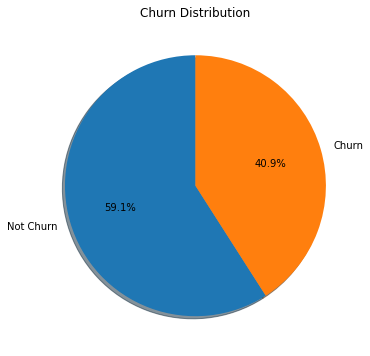

In [118]:
plt.figure(figsize=(10, 6))
plt.pie(df_rfm['churn'].value_counts(), labels=['Not Churn', 'Churn'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Churn Distribution')
plt.show()

Dari pie chart tersebut bisa dilihat bahwa data tersebut cukup seimbang, tidak ada yang dominan. Dari pie chart tersebut juga dapat dilihat bahwa customer yang tidak churn lebih banyak dibandingkan yang churn.

In [119]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833602 entries, 0 to 12833601
Data columns (total 47 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   session_id              object             
 1   event_name              object             
 2   event_time              datetime64[ns, UTC]
 3   event_id                object             
 4   traffic_source          object             
 5   event_metadata          object             
 6   created_at              datetime64[ns, UTC]
 7   customer_id             float64            
 8   booking_id              object             
 9   product_metadata        object             
 10  payment_method          object             
 11  payment_status          object             
 12  promo_amount            float64            
 13  promo_code              object             
 14  shipment_fee            float64            
 15  shipment_date_limit     datetime64[ns, UTC]
 16

In [120]:
df_1['traffic_source'].value_counts()

MOBILE    11548304
WEB        1285298
Name: traffic_source, dtype: int64

In [121]:
# Ubah kolom traffic_source menjadi 0 untuk web dan 1 untuk mobile
df_1['traffic_source'] = df_1['traffic_source'].apply(lambda x: 0 if x == 'web' else 1)


## Merge data

In [122]:
fixed_df = df_1.drop_duplicates(subset = ["customer_id"])

In [123]:
df_rfm = pd.merge(df_rfm, ongkir, on='customer_id')
df_rfm = pd.merge(df_rfm, total_promo, on='customer_id')

In [124]:
df = pd.merge(fixed_df, df_rfm, on='customer_id', how="inner")
df = pd.merge(df, act_cust, on='customer_id', how="inner")

In [125]:
df['ongkir']

0        25095000.0
1        84680000.0
2         3005000.0
3        83215000.0
4        89515000.0
            ...    
50699       40000.0
50700      200000.0
50701           0.0
50702       40000.0
50703       40000.0
Name: ongkir, Length: 50704, dtype: float64

In [126]:
df.duplicated().sum()

0

In [127]:
df.isna().sum()

session_id            0
event_name            0
event_time            0
event_id              0
traffic_source        0
                  ...  
HOMEPAGE              0
ITEM_DETAIL        6877
PROMO_PAGE        11640
SCROLL             6252
SEARCH             8539
Length: 74, dtype: int64

In [128]:
#mengubah nilai null pada aktivitas customer dengan 0
# df = df[["ADD_PROMO","CLICK", "ITEM_DETAIL", "PROMO_PAGE", "SCROLL", "SEARCH"]].fillna(0, inplace=True)
df = df.replace(np.nan, 0)

In [129]:
df.isna().sum()

session_id        0
event_name        0
event_time        0
event_id          0
traffic_source    0
                 ..
HOMEPAGE          0
ITEM_DETAIL       0
PROMO_PAGE        0
SCROLL            0
SEARCH            0
Length: 74, dtype: int64

In [130]:
df.corr()

traffic_source  event_metadata  customer_id  \
traffic_source                     NaN             NaN          NaN   
event_metadata                     NaN             NaN          NaN   
customer_id                        NaN             NaN     1.000000   
promo_amount                       NaN             NaN     0.001964   
shipment_fee                       NaN             NaN     0.005066   
shipment_location_lat              NaN             NaN    -0.001006   
shipment_location_long             NaN             NaN    -0.003831   
total_amount                       NaN             NaN    -0.003857   
id                                 NaN             NaN    -0.006300   
qty                                NaN             NaN    -0.006745   
price                              NaN             NaN     0.010665   
year                               NaN             NaN    -0.003739   
home_location_lat                  NaN             NaN     0.002652   
home_location_long                 NaN             NaN     0.004114   
purchase_year                      NaN             NaN     0.005362   
age                                NaN             NaN    -0.004673   
recent_days                        NaN             NaN    -0.004127   
frequency                          NaN             NaN     0.000893   
monetary                           NaN             NaN    -0.000440   
R_rank_norm                        NaN             NaN     0.003488   
F_rank_norm                        NaN             NaN     0.001029   
M_rank_norm                        NaN             NaN     0.001029   
RFM_Score                          NaN             NaN     0.001452   
tenure                             NaN             NaN    -0.001635   
monthly_spend                      NaN             NaN     0.008601   
freq_diff                          NaN             NaN    -0.002241   
churn                              NaN             NaN    -0.003483   
ongkir                             NaN             NaN    -0.000284   
total_promo                        NaN             NaN    -0.000125   
ADD_PROMO                          NaN             NaN    -0.000119   
ADD_TO_CART                        NaN             NaN     0.000033   
BOOKING                            NaN             NaN     0.000554   
CLICK                              NaN             NaN     0.000929   
HOMEPAGE                           NaN             NaN     0.001622   
ITEM_DETAIL                        NaN             NaN     0.000737   
PROMO_PAGE                         NaN             NaN     0.001102   
SCROLL                             NaN             NaN     0.000587   
SEARCH                             NaN             NaN     0.001195   

                        promo_amount  shipment_fee  shipment_location_lat  \
traffic_source                   NaN           NaN                    NaN   
event_metadata                   NaN           NaN                    NaN   
customer_id                 0.001964      0.005066              -0.001006   
promo_amount                1.000000     -0.004663              -0.008645   
shipment_fee               -0.004663      1.000000               0.000260   
shipment_location_lat      -0.008645      0.000260               1.000000   
shipment_location_long     -0.001322      0.008907               0.122935   
total_amount               -0.009790      0.008745              -0.003507   
id                          0.011228     -0.002606              -0.002406   
qty                        -0.006685      0.002125              -0.004619   
price                       0.000722     -0.002054               0.001264   
year                        0.000275     -0.000559               0.003342   
home_location_lat          -0.003578      0.002377               0.350315   
home_location_long          0.000864     -0.001727               0.033994   
purchase_year              -0.136150      0.000268               0.000657   
age                   

## Outlier Detection

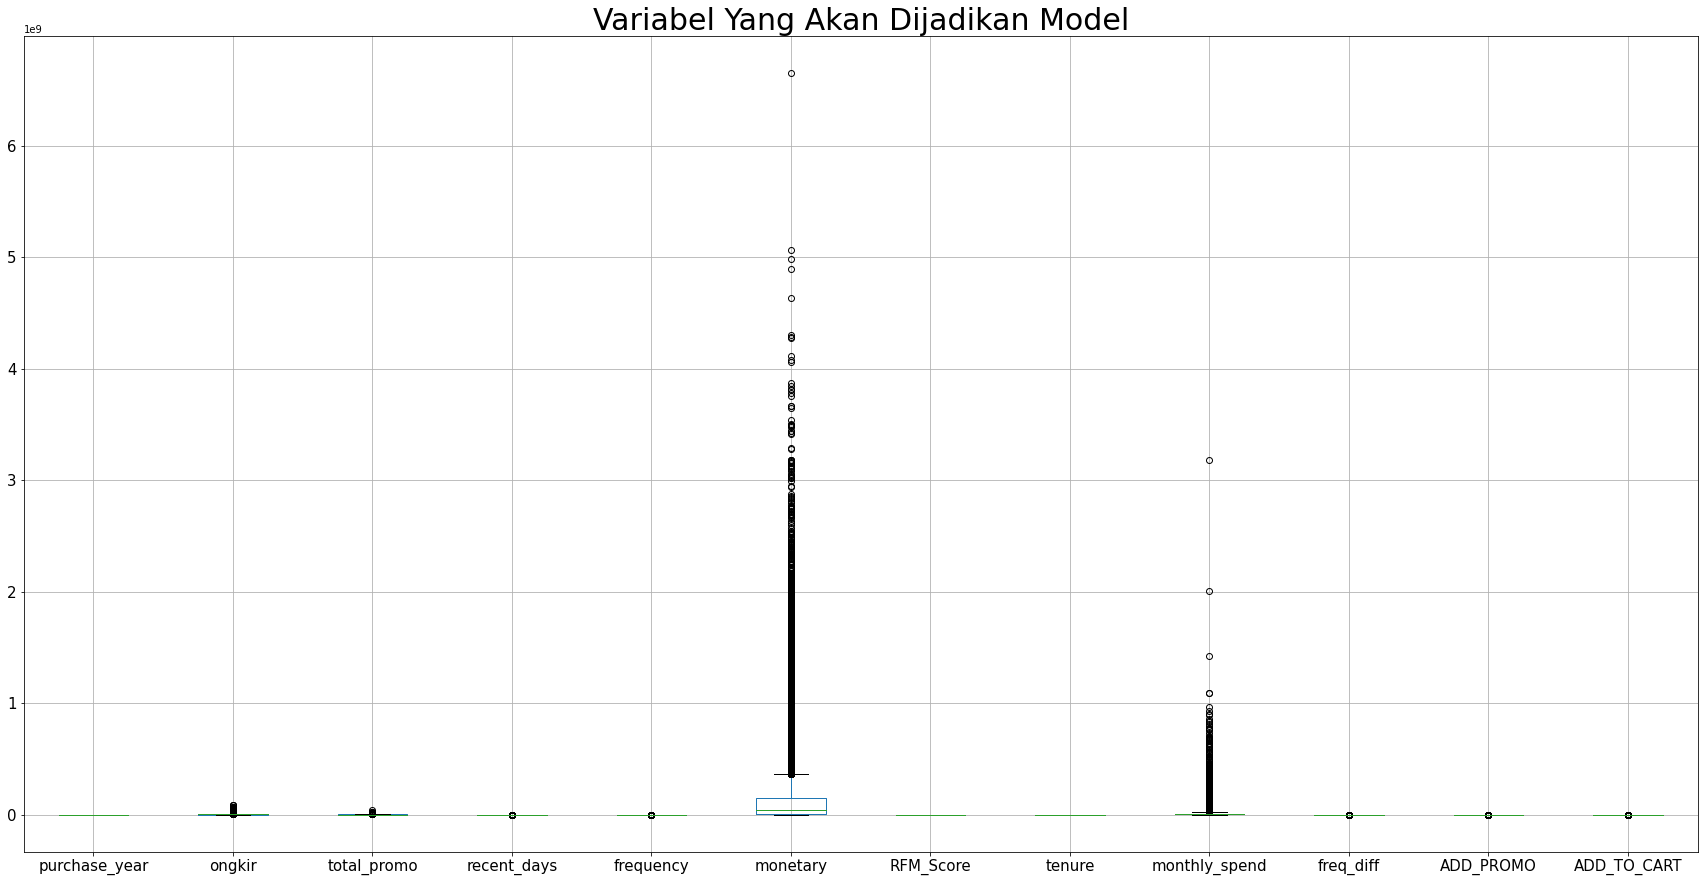

In [131]:
cols = ['purchase_year', 'ongkir','total_promo', 'recent_days', 'frequency', 'monetary', 'RFM_Score', 'tenure', 'monthly_spend', 'freq_diff', 'ADD_PROMO', 'ADD_TO_CART']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=30)
plt.show()

In [132]:
# Cek Outlier dengan IQR
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    return batas_bawah, batas_atas
    for i in data:
        if i < batas_bawah or i > batas_atas:
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
    data_outlier[col] = outlier_iqr(df[col])
    print('Outlier (',col,') : ',len(data_outlier[col]),' outlier',data_outlier[col])

Outlier ( purchase_year ) :  2  outlier (2013.5, 2025.5)
Outlier ( ongkir ) :  2  outlier (-2977500.0, 5402500.0)
Outlier ( total_promo ) :  2  outlier (-758722.875, 1320854.125)
Outlier ( recent_days ) :  2  outlier (-441.0, 839.0)
Outlier ( frequency ) :  2  outlier (-316.5, 583.5)
Outlier ( monetary ) :  2  outlier (-206697464.5, 366524419.5)
Outlier ( RFM_Score ) :  2  outlier (-2.380000000000001, 7.380000000000001)
Outlier ( tenure ) :  2  outlier (-48.21666666666666, 89.25)
Outlier ( monthly_spend ) :  2  outlier (-10478224.811250001, 20558036.578750003)
Outlier ( freq_diff ) :  2  outlier (-23.22815092383107, 39.111008201357464)
Outlier ( ADD_PROMO ) :  2  outlier (-6.5, 13.5)
Outlier ( ADD_TO_CART ) :  2  outlier (-52.0, 100.0)


In [133]:
# Handling (Monetary)
q1 = df['monetary'].quantile(0.25)
q3 = df['monetary'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['monetary'] = np.where(df['monetary'] > batas_atas, batas_atas, df['monetary'])
df['monetary'] = np.where(df['monetary'] < batas_bawah, batas_bawah, df['monetary'])

batas_bawah :  -206697464.5
batas_atas :  366524419.5


In [134]:
# Handling (Monthly Spend)
q1 = df['monthly_spend'].quantile(0.25)
q3 = df['monthly_spend'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['monthly_spend'] = np.where(df['monthly_spend'] > batas_atas, batas_atas, df['monthly_spend'])
df['monthly_spend'] = np.where(df['monthly_spend'] < batas_bawah, batas_bawah, df['monthly_spend'])

batas_bawah :  -10478224.811250001
batas_atas :  20558036.578750003


In [308]:
# Handling Ongkir
q1 = df['ongkir'].quantile(0.25)
q3 = df['ongkir'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['ongkir'] = np.where(df['ongkir'] > batas_atas, batas_atas, df['ongkir'])
df['ongkir'] = np.where(df['ongkir'] < batas_bawah, batas_bawah, df['ongkir'])

batas_bawah :  -2977500.0
batas_atas :  5402500.0


In [309]:
# Handling Total Promo
q1 = df['total_promo'].quantile(0.25)
q3 = df['total_promo'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['total_promo'] = np.where(df['total_promo'] > batas_atas, batas_atas, df['total_promo'])
df['total_promo'] = np.where(df['total_promo'] < batas_bawah, batas_bawah, df['total_promo'])

batas_bawah :  -758722.875
batas_atas :  1320854.125


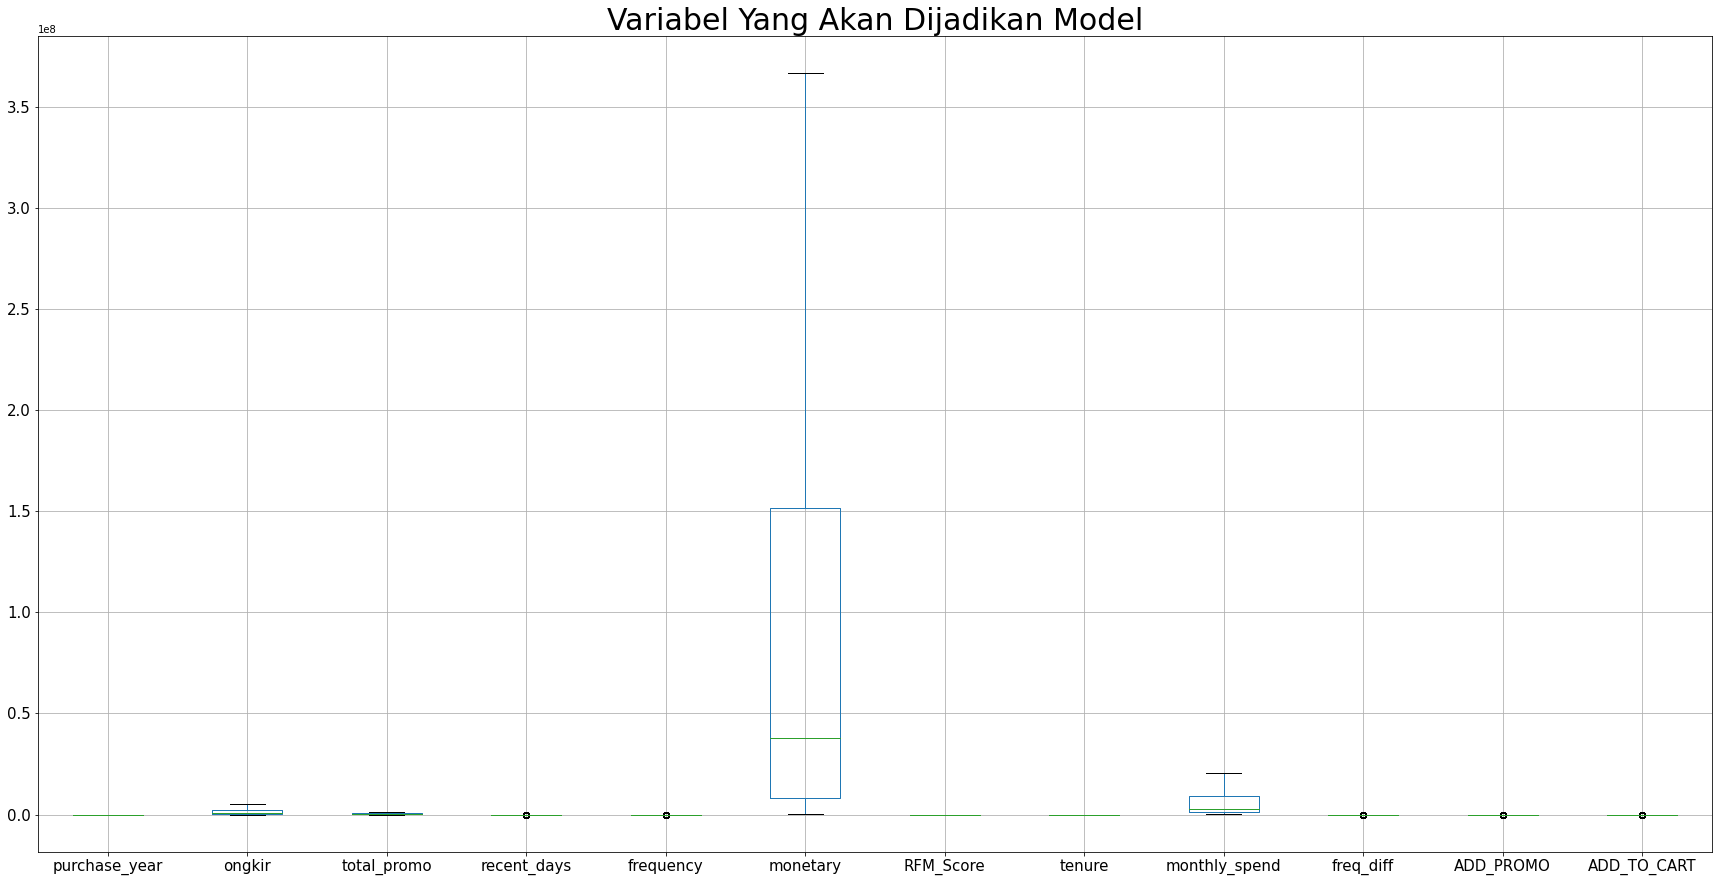

In [310]:
# Setelah dihandle
cols = ['purchase_year', 'ongkir','total_promo', 'recent_days', 'frequency', 'monetary', 'RFM_Score', 'tenure', 'monthly_spend', 'freq_diff', 'ADD_PROMO', 'ADD_TO_CART']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=30)
plt.show()

In [136]:
# Round 
df['monetary'].round(2)
df['monthly_spend'].round(2)
df['frequency'].round(2)



0        2395
1        9337
2         386
3        9760
4        8452
         ... 
50699       4
50700       4
50701       4
50702       4
50703       4
Name: frequency, Length: 50704, dtype: int64

In [137]:
df['monetary']

0        366524419.5
1        366524419.5
2        366524419.5
3        366524419.5
4        366524419.5
            ...     
50699      1171084.0
50700       865460.0
50701       834576.0
50702      1179796.0
50703       395672.0
Name: monetary, Length: 50704, dtype: float64

## EDA

In [138]:
import plotly.express as px
import matplotlib

In [139]:
px.histogram(df, x='home_location', title='Province vs. Churn', color='churn')

In [140]:
px.histogram(df, x='Customer_segment', title='Recency vs. Churn', color='churn')

In [141]:
px.histogram(df, x='frequency', title='Frequency vs. Churn', color='churn')

In [142]:
px.histogram(df, x='monetary', title='Monetary vs. Churn', color='churn')

In [143]:
px.histogram(df, x='recent_days', title='Recency vs. Churn', color='churn')

In [144]:
px.scatter(df.sample(20000), 
           title='frequency vs recent_days',
           x='frequency', 
           y='recent_days', 
           color='churn')

In [145]:
px.scatter(df.sample(20000), 
           title='monetary vs recent_days',
           x='monetary', 
           y='recent_days', 
           color='churn')

## Data Preprocessing

### Splitting Data

In [147]:
X = (df[['age', 'home_location', 'purchase_year', 'payment_method', 'ongkir','total_promo', 'device_type', 'gender', 'recent_days', 'frequency', 'monetary', 'RFM_Score', 'Customer_segment', 'tenure', 'monthly_spend', 'freq_diff', 'purchased_3m', 'ADD_PROMO', 'ADD_TO_CART', 'BOOKING', 'CLICK', 'HOMEPAGE', 'ITEM_DETAIL', 'PROMO_PAGE', 'SCROLL', 'SEARCH']])
y = (df['churn'])

In [148]:
X

age     home_location  purchase_year payment_method      ongkir  \
0      15.0    Kepulauan Riau         2019.0          Gopay  25095000.0   
1      26.0        Jawa Timur         2017.0     Debit Card  84680000.0   
2      25.0  Kalimantan Barat         2021.0    Credit Card   3005000.0   
3      23.0        Jawa Barat         2016.0    Credit Card  83215000.0   
4      30.0       Jawa Tengah         2017.0     Debit Card  89515000.0   
...     ...               ...            ...            ...         ...   
50699  19.0       Jawa Tengah         2021.0            OVO     40000.0   
50700  15.0        Jawa Barat         2020.0    Credit Card    200000.0   
50701  33.0        Jawa Timur         2022.0     Debit Card         0.0   
50702  33.0      Jakarta Raya         2021.0     Debit Card     40000.0   
50703  29.0              Bali         2021.0          Gopay     40000.0   

       total_promo device_type gender  recent_days  frequency  ...  \
0        6050218.0         0.0    0.0            7       2395  ...   
1       21225809.0         0.0    0.0            1       9337  ...   
2         457151.0         1.0    1.0           19        386  ...   
3       36436289.0         0.0    0.0            1       9760  ...   
4       22988531.0         0.0    0.0            1       8452  ...   
...            ...         ...    ...          ...        ...  ...   
50699          0.0         0.0    0.0          364          4  ...   
50700          0.0         0.0    1.0          677          4  ...   
50701          0.0         0.0    0.0          113          4  ...   
50702          0.0         0.0    1.0          419          4  ...   
50703          0.0         1.0    0.0          452          4  ...   

       purchased_3m  ADD_PROMO ADD_TO_CART  BOOKING   CLICK  HOMEPAGE  \
0                 1       62.0       186.0    133.0   536.0     463.0   
1                 1      214.0       716.0    503.0  2147.0    1822.0   
2                 1        5.0        42.0     25.0    80.0      80.0   
3                 1      348.0       807.0    550.0  2152.0    1851.0   
4                 1      222.0       693.0    473.0  1826.0    1646.0   
...             ...        ...         ...      ...     ...       ...   
50699             1        0.0         1.0      1.0     0.0       1.0   
50700             1        0.0         1.0      1.0     0.0       1.0   
50701             1        0.0         1.0      1.0     0.0       1.0   
50702             1        0.0         1.0      1.0     0.0       1.0   
50703             1        0.0         1.0      1.0     0.0       1.0   

      ITEM_DETAIL  PROMO_PAGE  SCROLL  SEARCH  
0           271.0       120.0   348.0   276.0  
1          1040.0       432.0  1397.0  1066.0  
2            41.0        19.0    56.0    38.0  
3           997.0       495.0  1535.0  1025.0  
4           900.0       401.0  1289.0  1002.0  
...           ...         ...     ...     ...  
50699         0.0         0.0     0.0     1.0  
50700         0.0         0.0     0.0     1.0  
50701         0.0         0.0     0.0     1.0  
50702         0.0         0.0     0.0     1.0  
50703         0.0         0.0     0.0     1.0  

[50704 rows x 26 columns]

In [149]:
y

0        0
1        0
2        0
3        0
4        0
        ..
50699    1
50700    1
50701    1
50702    1
50703    1
Name: churn, Length: 50704, dtype: int64

In [150]:
X.isna().sum()

age                 0
home_location       0
purchase_year       0
payment_method      0
ongkir              0
total_promo         0
device_type         0
gender              0
recent_days         0
frequency           0
monetary            0
RFM_Score           0
Customer_segment    0
tenure              0
monthly_spend       0
freq_diff           0
purchased_3m        0
ADD_PROMO           0
ADD_TO_CART         0
BOOKING             0
CLICK               0
HOMEPAGE            0
ITEM_DETAIL         0
PROMO_PAGE          0
SCROLL              0
SEARCH              0
dtype: int64

In [151]:
# Isi Misiing Value dengan Modus
#X['device_type'].fillna(X['device_type'].mode()[0])

# Handling Missing Value dengan Modus
#X['gender'].fillna(X['gender'].mode()[0])


In [152]:
X['purchased_3m'] = pd.to_numeric(X['purchased_3m'], errors='coerce')
X['gender'] = pd.to_numeric(X['gender'], errors='coerce')
X['device_type'] = pd.to_numeric(X['device_type'], errors='coerce')

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\362393142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\362393142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\362393142.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

### One Hot Encoding

In [153]:
categorical_cols = X.select_dtypes('object').columns.tolist()

In [154]:
df[categorical_cols].nunique()

home_location       33
payment_method       5
Customer_segment     5
dtype: int64

In [155]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [156]:
encoder.categories_

[array(['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu',
        'Gorontalo', 'Jakarta Raya', 'Jambi', 'Jawa Barat', 'Jawa Tengah',
        'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
        'Kalimantan Tengah', 'Kalimantan Timur', 'Kepulauan Riau',
        'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
        'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau',
        'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
        'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
        'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta'], dtype=object),
 array(['Credit Card', 'Debit Card', 'Gopay', 'LinkAja', 'OVO'],
       dtype=object),
 array(['High value Customer', 'Lost Customers', 'Low Value Customers',
        'Medium Value Customer', 'Top Customers'], dtype=object)]

In [157]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['home_location_Aceh', 'home_location_Bali', 'home_location_Bangka Belitung', 'home_location_Banten', 'home_location_Bengkulu', 'home_location_Gorontalo', 'home_location_Jakarta Raya', 'home_location_Jambi', 'home_location_Jawa Barat', 'home_location_Jawa Tengah', 'home_location_Jawa Timur', 'home_location_Kalimantan Barat', 'home_location_Kalimantan Selatan', 'home_location_Kalimantan Tengah', 'home_location_Kalimantan Timur', 'home_location_Kepulauan Riau', 'home_location_Lampung', 'home_location_Maluku', 'home_location_Maluku Utara', 'home_location_Nusa Tenggara Barat', 'home_location_Nusa Tenggara Timur', 'home_location_Papua', 'home_location_Papua Barat', 'home_location_Riau', 'home_location_Sulawesi Barat', 'home_location_Sulawesi Selatan', 'home_location_Sulawesi Tengah', 'home_location_Sulawesi Tenggara', 'home_location_Sulawesi Utara', 'home_location_Sumatera Barat', 'home_location_Sumatera Selatan', 'home_location_Sumatera Utara', 'home_location_Yogyakarta', 'payment_method_C

c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [158]:
X[encoded_cols] = encoder.transform(X[categorical_cols])

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\1280990752.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\1280990752.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\1280990752.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [159]:
X.columns

Index(['age', 'home_location', 'purchase_year', 'payment_method', 'ongkir',
       'total_promo', 'device_type', 'gender', 'recent_days', 'frequency',
       'monetary', 'RFM_Score', 'Customer_segment', 'tenure', 'monthly_spend',
       'freq_diff', 'purchased_3m', 'ADD_PROMO', 'ADD_TO_CART', 'BOOKING',
       'CLICK', 'HOMEPAGE', 'ITEM_DETAIL', 'PROMO_PAGE', 'SCROLL', 'SEARCH',
       'home_location_Aceh', 'home_location_Bali',
       'home_location_Bangka Belitung', 'home_location_Banten',
       'home_location_Bengkulu', 'home_location_Gorontalo',
       'home_location_Jakarta Raya', 'home_location_Jambi',
       'home_location_Jawa Barat', 'home_location_Jawa Tengah',
       'home_location_Jawa Timur', 'home_location_Kalimantan Barat',
       'home_location_Kalimantan Selatan', 'home_location_Kalimantan Tengah',
       'home_location_Kalimantan Timur', 'home_location_Kepulauan Riau',
       'home_location_Lampung', 'home_location_Maluku',
       'home_location_Maluku Utara', 'home_

In [160]:
X.drop(categorical_cols, axis=1, inplace=True)

C:\Users\Fauzan Kamil\AppData\Local\Temp\ipykernel_11496\17235414.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
pd.set_option('display.max_columns', None)

In [162]:
print('Jumlah data Predictor (X)  :', X.shape)

Jumlah data Predictor (X)  : (50704, 66)


### Oversampling

In [163]:
# Cek Imbalance Data
# Over Sampling (SMOTE)
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#X, y = SMOTE().fit_resample(X, y)
#print(sorted(Counter(y).items()))


### Feature Scaling

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
#print(X)

MinMaxScaler()

In [318]:
# Cek Korelasi
df_korelasi = df.corr()
df_korelasi = df_korelasi['churn'].sort_values(ascending=False)
df_korelasi = pd.DataFrame(df_korelasi)
df_korelasi = df_korelasi.reset_index()
df_korelasi.columns = ['feature', 'churn']
df_korelasi

feature     churn
0                    churn  1.000000
1              recent_days  0.461879
2                freq_diff  0.328398
3                   tenure  0.065686
4             promo_amount  0.058635
5       home_location_long  0.005110
6        home_location_lat  0.003497
7                       id  0.003401
8                     year  0.001923
9    shipment_location_lat -0.000511
10  shipment_location_long -0.000547
11            shipment_fee -0.001484
12                     age -0.002232
13             customer_id -0.003483
14                   price -0.003834
15                     qty -0.010259
16            total_amount -0.017630
17             ADD_TO_CART -0.042964
18               ADD_PROMO -0.090043
19                 BOOKING -0.155176
20             total_promo -0.161281
21                HOMEPAGE -0.170387
22              PROMO_PAGE -0.171573
23               frequency -0.182896
24             ITEM_DETAIL -0.202035
25                   CLICK -0.214577
26                  SCROLL -0.222738
27                  SEARCH -0.224636
28                monetary -0.245105
29                  ongkir -0.254242
30           monthly_spend -0.359061
31           purchase_year -0.385007
32             M_rank_norm -0.434219
33             F_rank_norm -0.434219
34               RFM_Score -0.479543
35             R_rank_norm -0.641081
36          traffic_source       NaN
37          event_metadata       NaN

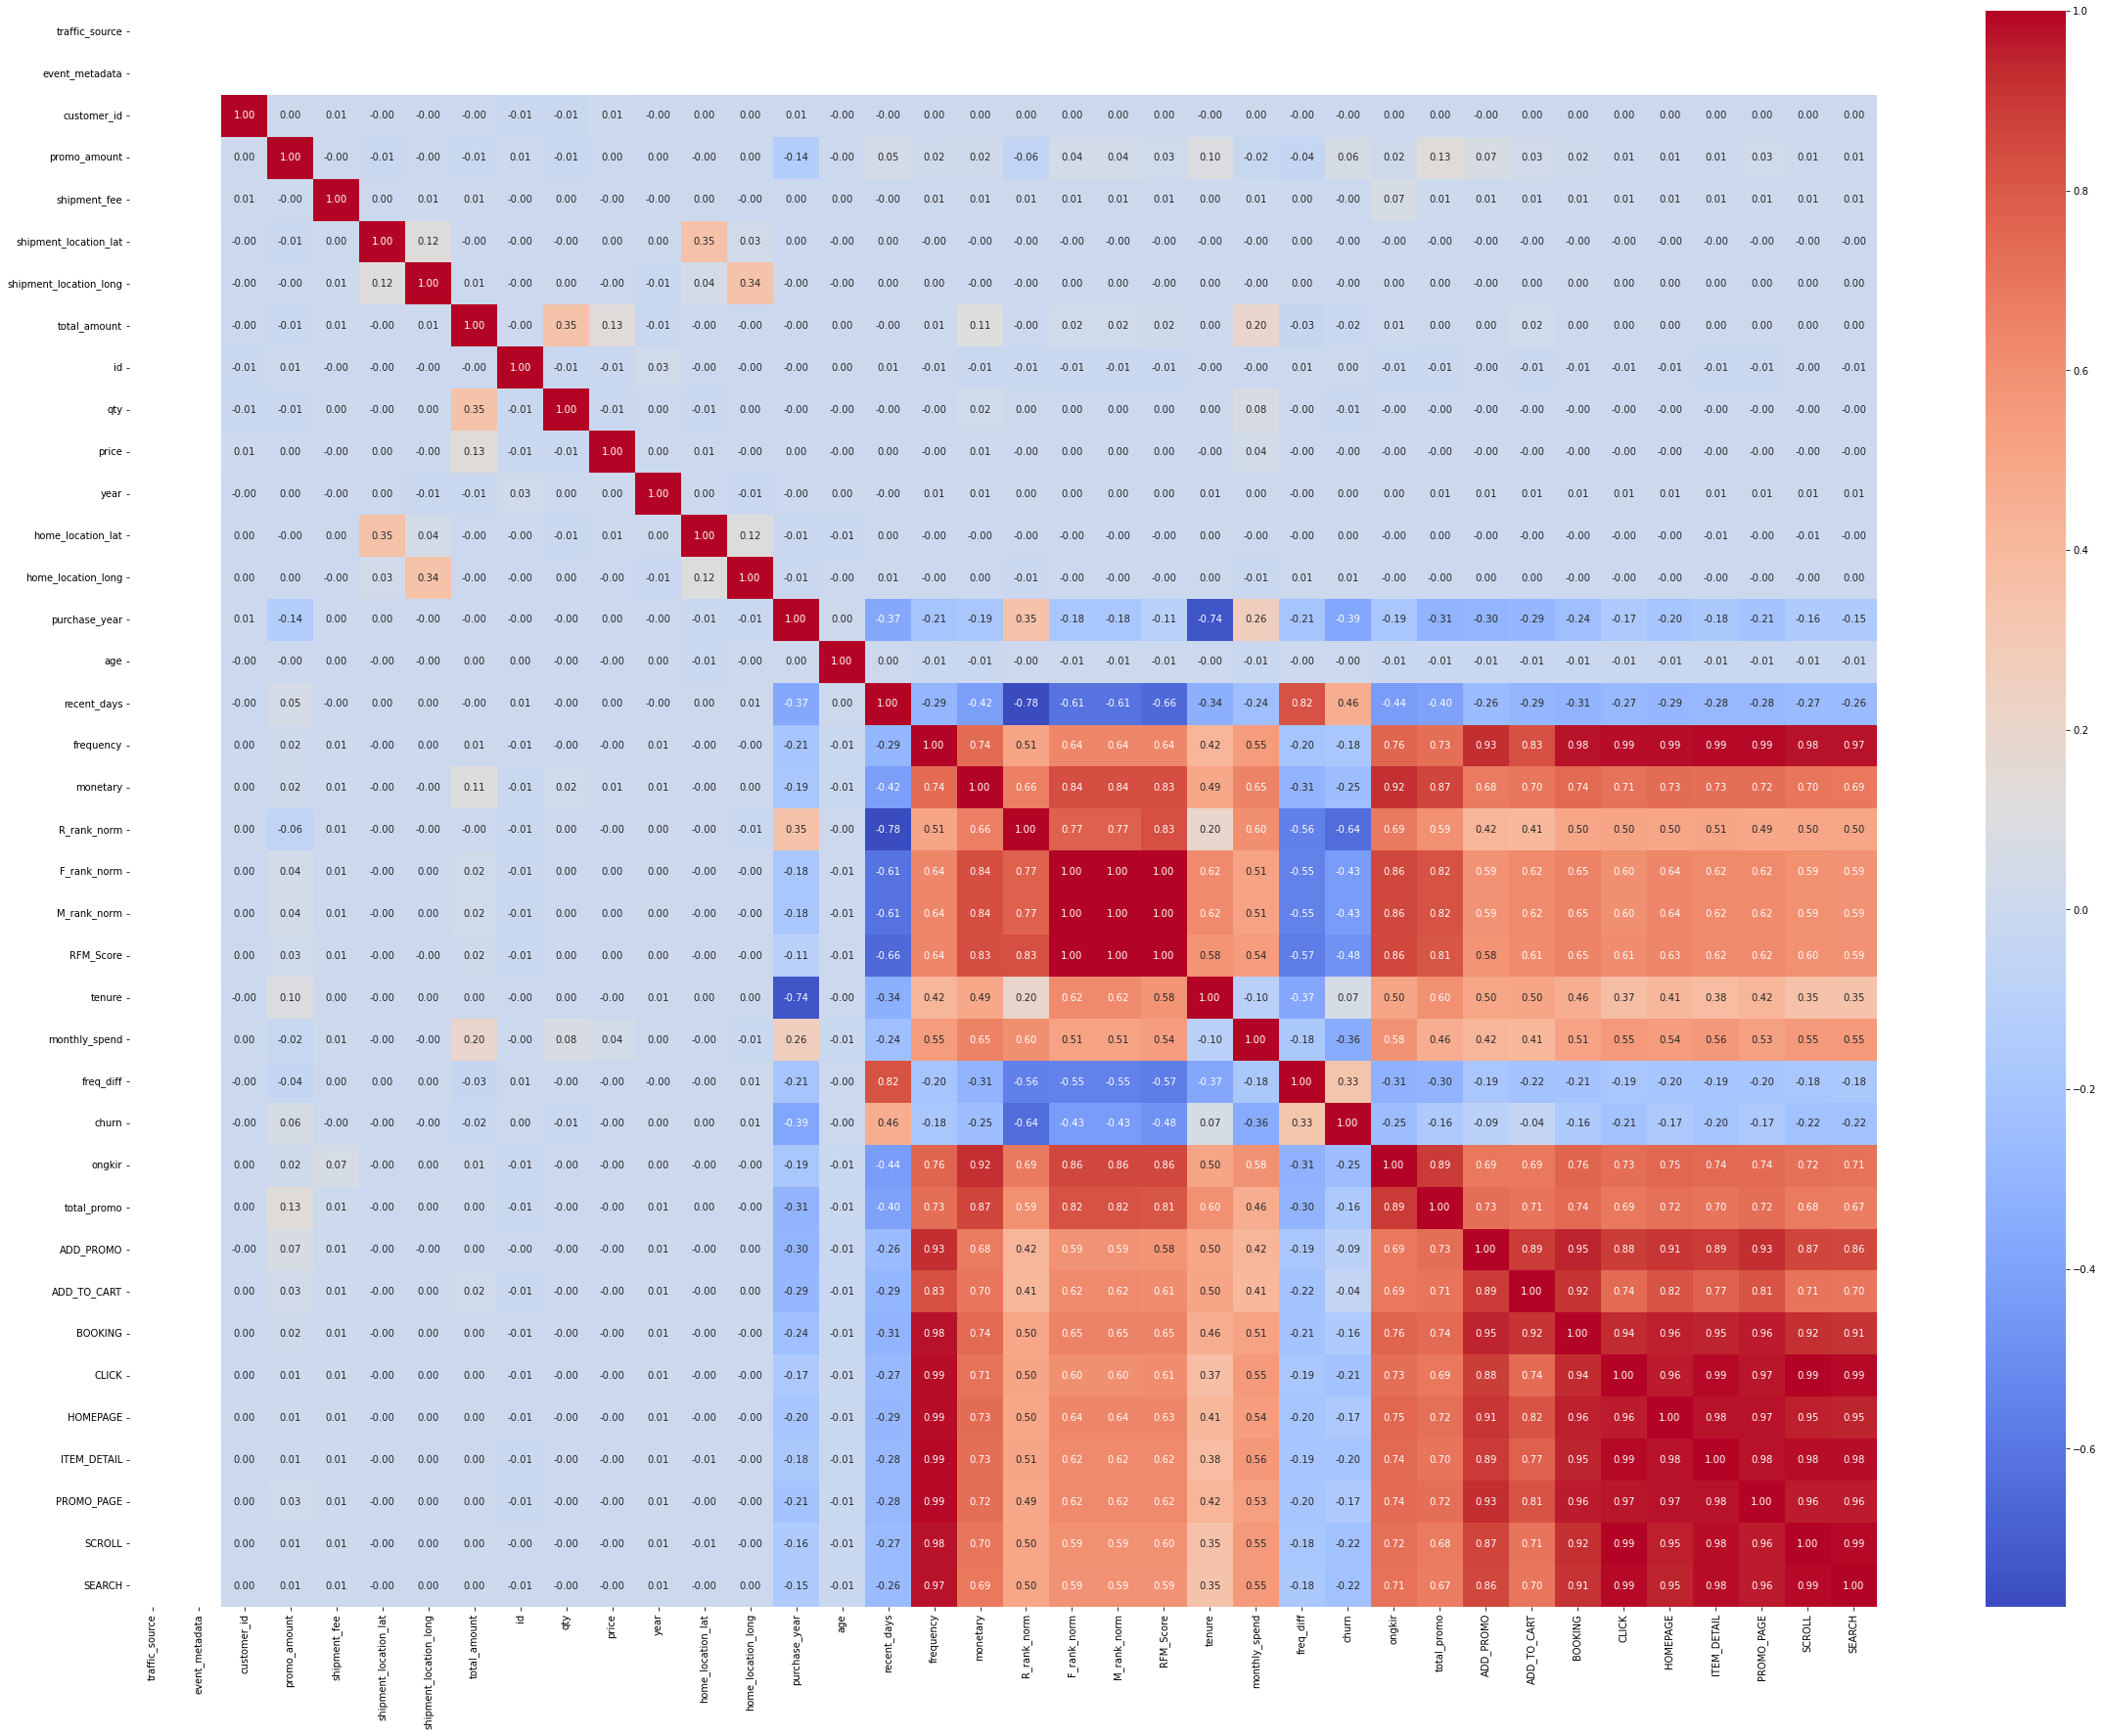

In [315]:
# Cek Korelasi
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Modeling

Feature yang digunakan untuk modeling adalah sebagai berikut:
- **age** : Umur customer
- **gender** : Jenis kelamin customer
- **device_type** : Tipe device customer
- **home_location** : Lokasi customer yang sudah di lakukannya one hot encoding
- **purchase_year** : 
- **payment_method** : Metode pembayaran customer yang sudah di lakukannya one hot encoding
- **total_promo** : Jumlah promo yang diberikan
- **ongkir** : Biaya pengiriman
- **recent_days** : Jumlah hari terakhir customer melakukan transaksi
- **frequency** : 
- **monetary** :
- **RFM_Score** :
- **Customer_segment** : Segmentasi customer yang sudah di lakukannya one hot encoding
- **tenure** :
- **monthly_spend** :
- **freq_diff** :
- **purchased_3m** :
- **ADD_PROMO** :
- **ADD_TO_CART** :
- **BOOKING** :
- **CLICK** :
- **HOMEPAGE** : 
- **ITEM_DETAIL** :
- **PROMO_PAGE** :
- **SCROLL** :
- **SEARCH** :

Dan feature target yang digunakan adalah **Churn**

In [166]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

### Logictic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [169]:
preds = model.predict(X_test)
preds[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(preds, y_test)

0.6886894783551918

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
confusion_matrix(preds, y_test, normalize='true')

array([[0.6918312 , 0.3081688 ],
       [0.31238423, 0.68761577]])

In [174]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 69.29%


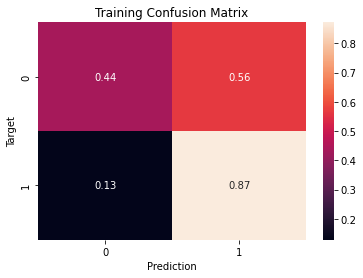

In [175]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

Accuracy: 69.51%


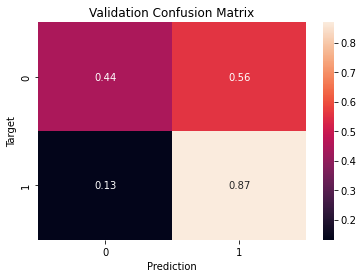

In [176]:
val_preds = predict_and_plot(X_val, y_val, 'Validation')

Accuracy: 68.87%


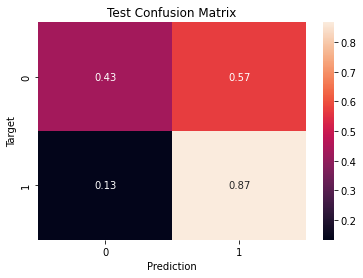

In [177]:
test_preds = predict_and_plot(X_test, y_test, 'Test')

In [178]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53      4148
           1       0.69      0.87      0.77      5993

    accuracy                           0.69     10141
   macro avg       0.69      0.65      0.65     10141
weighted avg       0.69      0.69      0.67     10141



In [179]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Logistic Regresi',mean_absolute_error(y_test, test_preds))


MAE Logistic Regresi 0.3113105216448082


ROC AUC Logistic Regresi 0.6489942018500852


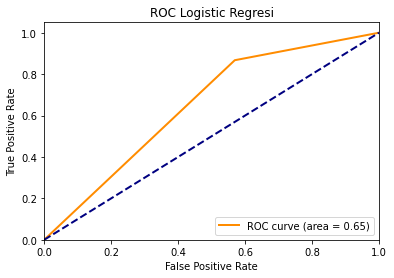

In [180]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Logistic Regresi',roc_auc_score(y_test, test_preds))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regresi')
plt.legend(loc="lower right")
plt.show()


c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

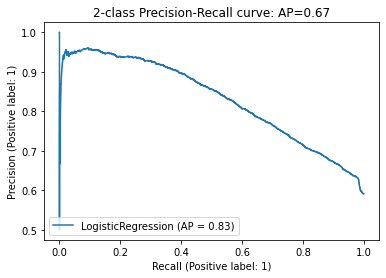

In [181]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, test_preds)))


In [182]:
# Akurasi
print('Akurasi Logistic Regresi     : ',accuracy_score(y_test, test_preds))
# Precision
print('Precision Logistic Regresi   : ',precision_score(y_test, test_preds))
# Recall
print('Recall Logistic Regresi      : ',recall_score(y_test, test_preds))
# F1
print('F1 Logistic Regresi          : ',f1_score(y_test, test_preds))
# MSE
print('MSE Logistic Regresi         : ',mean_squared_error(y_test, test_preds))
# ROC AUC
print('ROC AUC Logistic Regresi     : ',roc_auc_score(y_test, test_preds))


Akurasi Logistic Regresi     :  0.6886894783551918
Precision Logistic Regresi   :  0.6876157713680868
Recall Logistic Regresi      :  0.8671783747705657
F1 Logistic Regresi          :  0.7670282635967826
MSE Logistic Regresi         :  0.3113105216448082
ROC AUC Logistic Regresi     :  0.6489942018500852


## Support Vector Machine (SVM)

In [183]:
# Library SVM
#%%time
from sklearn.svm import SVC
model_svm = SVC(C=0.1, kernel='rbf', gamma=0.01)
model_svm.fit(X_train, y_train)


SVC(C=0.1, gamma=0.01)

In [184]:
def svm_model(inputs, targets, name='' ):
    pred_svm = model_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy: {:.2f}%".format(accuracy_svm * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_svm


Accuracy: 59.05%


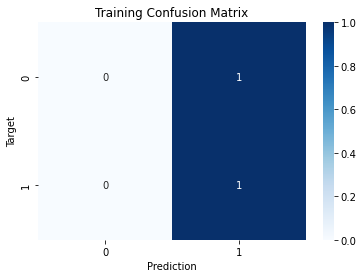

In [185]:
# Training
train_svm = svm_model(X_train, y_train, 'Training')

Accuracy: 59.10%


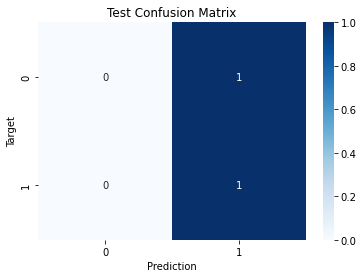

In [186]:
# Prediksi SVM
pred_svm = svm_model(X_test, y_test, 'Test')

Accuracy: 59.03%


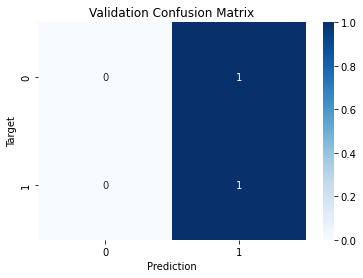

In [187]:
# Validation
val_svm = svm_model(X_val, y_val, 'Validation')

In [188]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4148
           1       0.59      1.00      0.74      5993

    accuracy                           0.59     10141
   macro avg       0.30      0.50      0.37     10141
weighted avg       0.35      0.59      0.44     10141



c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [189]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE SVM',mean_absolute_error(y_test, pred_svm))


MAE SVM 0.40903263977911447


In [190]:
# MSE
from sklearn.metrics import mean_squared_error
print('MSE SVM',mean_squared_error(y_test, pred_svm))

MSE SVM 0.40903263977911447


ROC AUC SVM 0.5


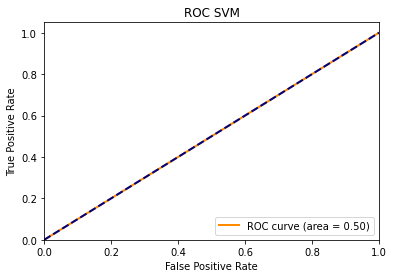

In [191]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC SVM',roc_auc_score(y_test, pred_svm))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM')
plt.legend(loc="lower right")
plt.show()

c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.59')

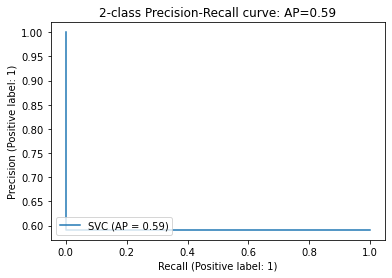

In [192]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_svm, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_svm)))
                        

In [193]:
# Akurasi
print('Akurasi SVM     : ',accuracy_score(y_test, pred_svm))
# Precision
print('Precision SVM   : ',precision_score(y_test, pred_svm))
# Recall
print('Recall SVM      : ',recall_score(y_test, pred_svm))
# F1
print('F1 SVM          : ',f1_score(y_test, pred_svm))
# MSE
print('MSE SVM         : ',mean_squared_error(y_test, pred_svm))
# ROC AUC
print('ROC AUC SVM     : ',roc_auc_score(y_test, pred_svm))

Akurasi SVM     :  0.5909673602208855
Precision SVM   :  0.5909673602208855
Recall SVM      :  1.0
F1 SVM          :  0.7429031858187677
MSE SVM         :  0.40903263977911447
ROC AUC SVM     :  0.5


## Random Forest

In [194]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [195]:
# Prediksi Random Forest
rf_mod = model_rf.predict(X_test)
rf_mod[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [196]:
def rf_model(inputs, targets, name=''):
    pred_rf = model.predict(inputs)
    accuracy_rf = accuracy_score(targets,pred_rf)
    print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

    cm = confusion_matrix(targets, pred_rf, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_rf


Accuracy: 69.29%


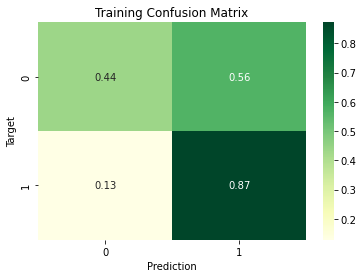

In [197]:
# Training
train_rf = rf_model(X_train, y_train, 'Training')

Accuracy: 68.87%


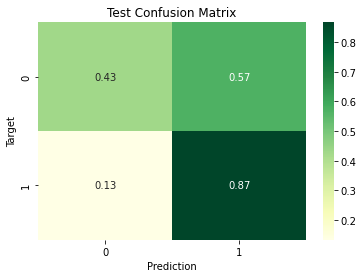

In [198]:
# Prediksi Random Forest
pred_rf = rf_model(X_test, y_test, 'Test')

Accuracy: 69.51%


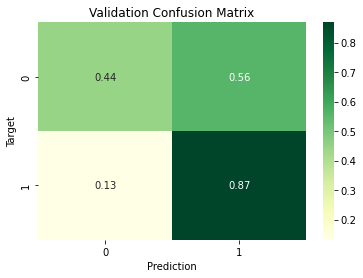

In [199]:
# Validation
val_rf = rf_model(X_val, y_val, 'Validation')

In [200]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53      4148
           1       0.69      0.87      0.77      5993

    accuracy                           0.69     10141
   macro avg       0.69      0.65      0.65     10141
weighted avg       0.69      0.69      0.67     10141



In [201]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Random Forest',mean_absolute_error(y_test, pred_rf))

MAE Random Forest 0.3113105216448082


ROC AUC Random Forest 0.6489942018500852


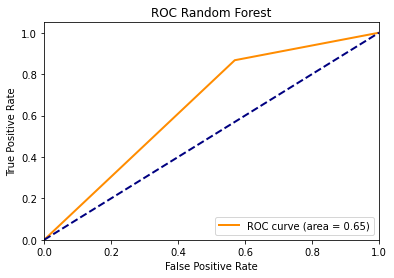

In [202]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Random Forest',roc_auc_score(y_test, pred_rf))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Random Forest')
plt.legend(loc="lower right")
plt.show()


c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

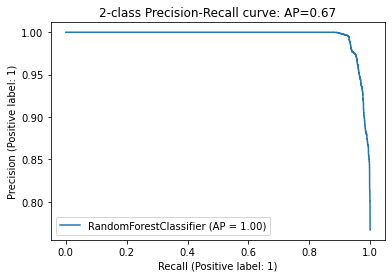

In [203]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_rf)))
                        

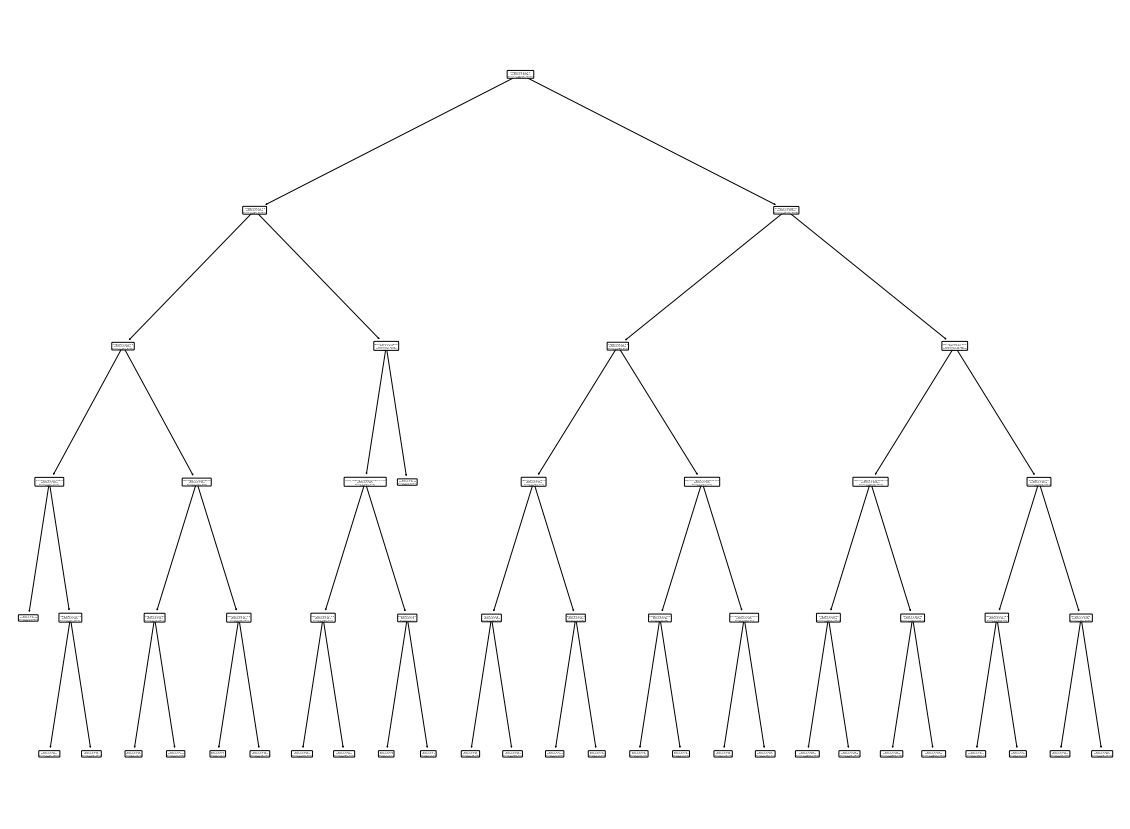

In [204]:
# Graph Model
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model_rf.estimators_[0], filled=False, rounded=True, class_names=['0', '1'], feature_names=X.columns)
plt.show()

In [205]:
# Akurasi
print('Akurasi Random Forest     : ',accuracy_score(y_test, pred_rf))
# Precision
print('Precision Random Forest   : ',precision_score(y_test, pred_rf))
# Recall
print('Recall Random Forest      : ',recall_score(y_test, pred_rf))
# F1
print('F1 Random Forest          : ',f1_score(y_test, pred_rf))
# MSE
print('MSE Random Forest         : ',mean_squared_error(y_test, pred_rf))
# ROC AUC
print('ROC AUC Random Forest     : ',roc_auc_score(y_test, pred_rf))


Akurasi Random Forest     :  0.6886894783551918
Precision Random Forest   :  0.6876157713680868
Recall Random Forest      :  0.8671783747705657
F1 Random Forest          :  0.7670282635967826
MSE Random Forest         :  0.3113105216448082
ROC AUC Random Forest     :  0.6489942018500852


## Decision Tree

In [294]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [295]:
dt_mod = model_dt.predict(X_test)
dt_mod[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [296]:
def dt_model(inputs, targets, name=''):
    pred_dt = model_dt.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy: {:.2f}%".format(accuracy_dt * 100))

    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_dt

Accuracy: 90.64%


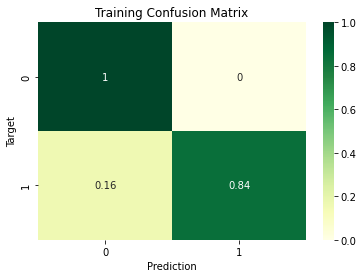

In [297]:
# Train Decision Tree
train_dt = dt_model(X_train, y_train, 'Training')

Accuracy: 90.76%


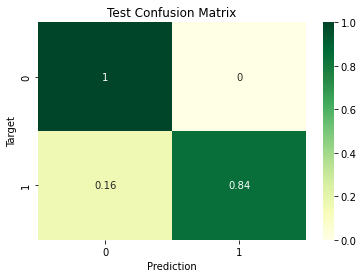

In [298]:
# Prediksi Decision Tree
dt_pred = dt_model(X_test, y_test, 'Test')

Accuracy: 90.74%


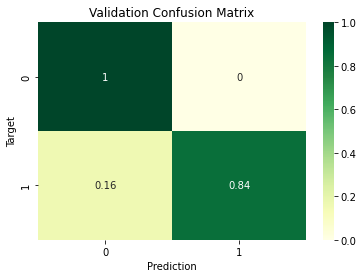

In [299]:
# Validation
val_dt = dt_model(X_val, y_val, 'Validation')

In [300]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4148
           1       1.00      0.84      0.92      5993

    accuracy                           0.91     10141
   macro avg       0.91      0.92      0.91     10141
weighted avg       0.92      0.91      0.91     10141



In [301]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Decision Tree',mean_absolute_error(y_test, dt_pred))


MAE Decision Tree 0.09239719948723006


ROC AUC Decision Tree 0.9218254630402136


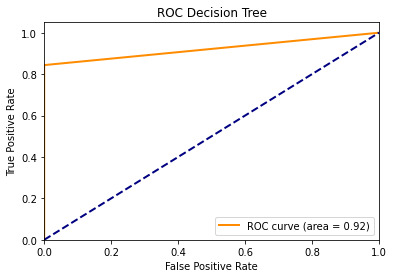

In [302]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Decision Tree',roc_auc_score(y_test, dt_pred))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Decision Tree')
plt.legend(loc="lower right")
plt.show()


c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.94')

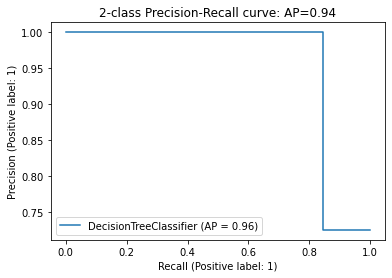

In [303]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_dt, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, dt_pred)))
                        

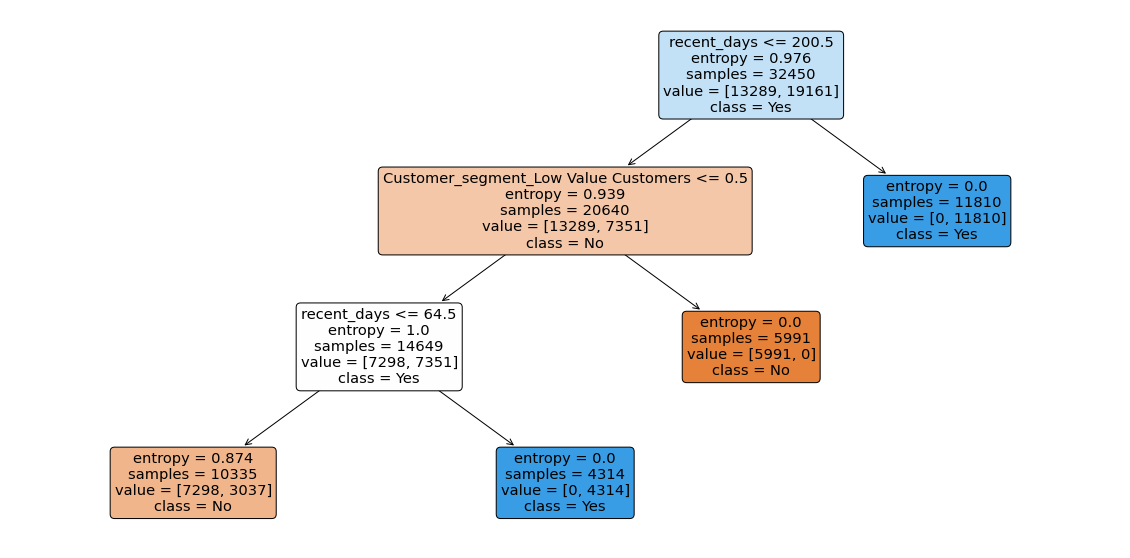

In [304]:
# Pohon Keputusan
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_dt, filled=True, rounded=True, class_names=['No', 'Yes'], feature_names=X.columns);
plt.show()

In [305]:
# Akurasi
print('Akurasi Decision Tree     : ',accuracy_score(y_test, dt_pred))
# Precision
print('Precision Decision Tree   : ',precision_score(y_test, dt_pred))
# Recall
print('Recall Decision Tree      : ',recall_score(y_test, dt_pred))
# F1
print('F1 Decision Tree          : ',f1_score(y_test, dt_pred))
# MSE
print('MSE Decision Tree         : ',mean_squared_error(y_test, dt_pred))
# ROC AUC
print('ROC AUC Decision Tree     : ',roc_auc_score(y_test, dt_pred))


Akurasi Decision Tree     :  0.90760280051277
Precision Decision Tree   :  1.0
Recall Decision Tree      :  0.8436509260804271
F1 Decision Tree          :  0.9151959453344193
MSE Decision Tree         :  0.09239719948723006
ROC AUC Decision Tree     :  0.9218254630402136


## Naive Bayes

In [218]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB(var_smoothing=1e-09)
model_nb.fit(X_train, y_train)

GaussianNB()

In [219]:
nb_mod = model_nb.predict(X_test)
nb_mod[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [220]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy: {:.2f}%".format(accuracy_nb * 100))

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy: 65.16%


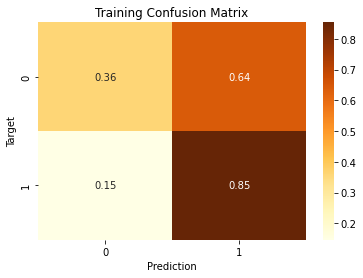

In [221]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy: 64.67%


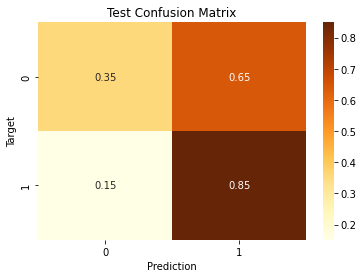

In [222]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

Accuracy: 64.88%


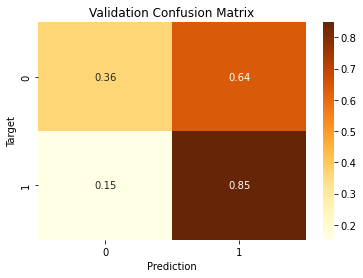

In [223]:
# Validation
val_nb = nb_model(X_val, y_val, 'Validation')


In [224]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))


              precision    recall  f1-score   support

           0       0.62      0.35      0.45      4148
           1       0.66      0.85      0.74      5993

    accuracy                           0.65     10141
   macro avg       0.64      0.60      0.60     10141
weighted avg       0.64      0.65      0.62     10141



In [225]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_pred))


MAE Naive Bayes 0.3533182131939651


ROC AUC Naive Bayes 0.601689072802873


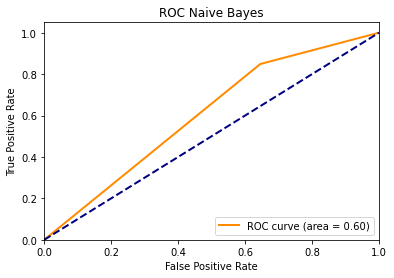

In [226]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Naive Bayes',roc_auc_score(y_test, nb_pred))

#`Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes')
plt.legend(loc="lower right")
plt.show()


c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.65')

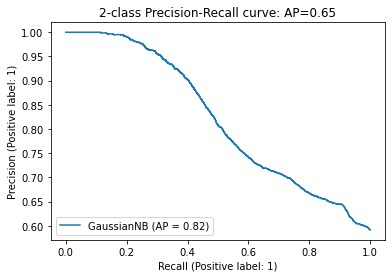

In [227]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_nb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, nb_pred)))
                        

In [228]:
# Akurasi
print('Akurasi Naive Bayes     : ',accuracy_score(y_test, nb_pred))
# Precision
print('Precision Naive Bayes   : ',precision_score(y_test, nb_pred))
# Recall
print('Recall Naive Bayes      : ',recall_score(y_test, nb_pred))
# F1
print('F1 Naive Bayes          : ',f1_score(y_test, nb_pred))
# MSE
print('MSE Naive Bayes         : ',mean_squared_error(y_test, nb_pred))
# ROC AUC
print('ROC AUC Naive Bayes     : ',roc_auc_score(y_test, nb_pred))


Akurasi Naive Bayes     :  0.6466817868060349
Precision Naive Bayes   :  0.6551635333505021
Recall Naive Bayes      :  0.848990488903721
F1 Naive Bayes          :  0.7395886328948325
MSE Naive Bayes         :  0.3533182131939651
ROC AUC Naive Bayes     :  0.601689072802873


## Jaringan Syaraf Tiruan (ANN)

In [229]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [230]:
# Model ANN
model_ann = Sequential()
# Input Layer
model_ann.add(tf.keras.layers.Dense(62, input_dim=66, activation='relu'))
# Hidden Layer 1
model_ann.add(tf.keras.layers.Dense(32, activation='relu'))
# Hidden Layer 2
model_ann.add(tf.keras.layers.Dense(32, activation='relu'))
# Hidden Layer 3
model_ann.add(tf.keras.layers.Dense(16, activation='relu'))
# Hiden Layer 4
model_ann.add(tf.keras.layers.Dense(16, activation='relu'))
# Output Layer
model_ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 62)                4154      
                                                                 
 dense_1 (Dense)             (None, 32)                2016      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,043
Trainable params: 8,043
Non-trainabl

In [231]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [232]:
model_ann.fit(X_train,y_train, epochs=100,
                steps_per_epoch=10, batch_size=32, 
                validation_data=(X_val, y_val), validation_steps=10)

Epoch 1/100
10/10 [==============================] - 2s 78ms/step - loss: 2113576.2500 - accuracy: 0.5188 - val_loss: 734468.5000 - val_accuracy: 0.4344
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 785059.8750 - accuracy: 0.4031 - val_loss: 180257.7656 - val_accuracy: 0.5656
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 233453.4531 - accuracy: 0.6062 - val_loss: 128728.3125 - val_accuracy: 0.6219
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 78166.5625 - accuracy: 0.6125 - val_loss: 93912.9531 - val_accuracy: 0.6281
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 92965.9219 - accuracy: 0.6406 - val_loss: 98549.5312 - val_accuracy: 0.6062
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 45246.3906 - accuracy: 0.6625 - val_loss: 48189.2422 - val_accuracy: 0.6344
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 25677.8574 - accuracy: 

In [233]:
# Prediksi ANN
ann_pred = (model_ann.predict(X_test)>0.5).astype("int32")
ann_pred[:5]

317/317 [==============================] - 1s 1ms/step


array([[0],
       [0],
       [0],
       [0],
       [1]])

In [234]:
# Akurasi ANN
model_ann.evaluate(X_test, y_test)[1]

317/317 [==============================] - 1s 2ms/step - loss: 10077.0693 - accuracy: 0.6321


0.6320875883102417

In [235]:
print(accuracy_score(y_test, ann_pred))

0.632087565328863


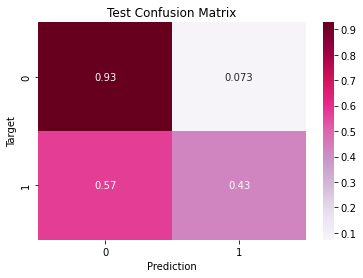

In [236]:
# Confusion Matrix ANN
cm = confusion_matrix(y_test, ann_pred, normalize='true')
plt.figure()
sns.heatmap(cm, annot=True, cmap='PuRd')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')
plt.show()

In [237]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, ann_pred))


              precision    recall  f1-score   support

           0       0.53      0.93      0.67      4148
           1       0.89      0.43      0.58      5993

    accuracy                           0.63     10141
   macro avg       0.71      0.68      0.63     10141
weighted avg       0.74      0.63      0.62     10141



In [238]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE ANN',mean_absolute_error(y_test, ann_pred))


MAE ANN 0.367912434671137


ROC AUC ANN 0.6774760404335435


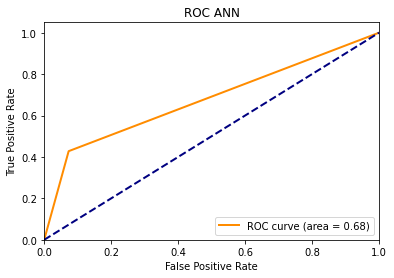

In [239]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC ANN',roc_auc_score(y_test, ann_pred))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, ann_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ANN')
plt.legend(loc="lower right")
plt.show()

In [281]:
# Akurasi ANN
akurasi = model_ann.evaluate(X_test, y_test)[1]
print('Akurasi ANN      : ', akurasi)
# Recall ANN
print('Recall ANN       : ',recall_score(y_test, ann_pred))
# Precision ANN
print('Precision ANN    : ',precision_score(y_test, ann_pred))
# F1 ANN
print('F1 ANN           : ',f1_score(y_test, ann_pred))
# MSE
print('MSE ANN          : ',mean_squared_error(y_test, ann_pred))
# ROC AUC ANN
print('ROC AUC ANN      : ',roc_auc_score(y_test, ann_pred))



317/317 [==============================] - 1s 2ms/step - loss: 10077.0693 - accuracy: 0.6321
Akurasi ANN      :  0.6320875883102417
Recall ANN       :  0.42799933255464706
Precision ANN    :  0.8943514644351465
F1 ANN           :  0.5789414287326488
MSE ANN          :  0.367912434671137
ROC AUC ANN      :  0.6774760404335435


## K Nearest Neighbors (KNN)

In [241]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [242]:
knn_mod = model_knn.predict(X_test)
knn_mod[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [243]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy: {:.2f}%".format(accuracy_knn * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy: 86.00%


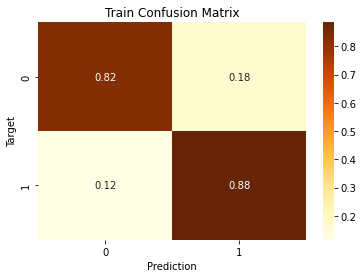

In [244]:
# Train
knn_train = knn_model(X_train, y_train, name='Train')

Accuracy: 80.57%


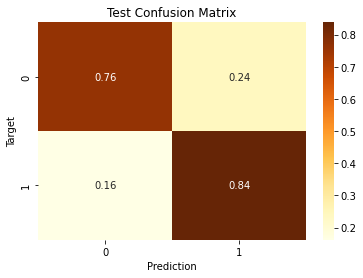

In [245]:
# Test
knn_pred = knn_model(X_test, y_test, name='Test')


Accuracy: 80.03%


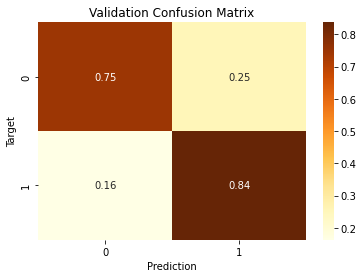

In [246]:
# Validation
knn_val = knn_model(X_val, y_val, name='Validation')

In [247]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4148
           1       0.83      0.84      0.84      5993

    accuracy                           0.81     10141
   macro avg       0.80      0.80      0.80     10141
weighted avg       0.81      0.81      0.81     10141



In [248]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE KNN',mean_absolute_error(y_test, knn_pred))


MAE KNN 0.19426092101370673


ROC AUC KNN 0.7985322316730495


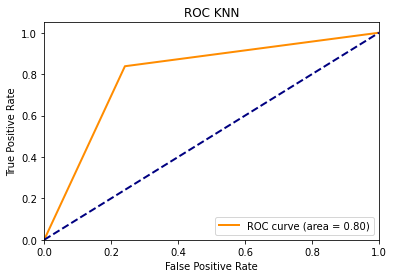

In [249]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC KNN',roc_auc_score(y_test, knn_pred))

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(loc="lower right")
plt.show()


In [257]:
# Akurasi KNN
print('Akurasi KNN      : ',model_knn.score(X_test, y_test))
# Recall KNN
print('Recall KNN       : ',recall_score(y_test, knn_pred))
# Precision KNN
print('Precision KNN    : ',precision_score(y_test, knn_pred))
# F1 KNN
print('F1 KNN           : ',f1_score(y_test, knn_pred))
# MSE
print('MSE KNN          : ',mean_squared_error(y_test, knn_pred))
# ROC AUC
print('ROC AUC KNN      : ',roc_auc_score(y_test, knn_pred))


AKurasi KNN      :  0.8057390789862933
Recall KNN       :  0.8381445019189054
Precision KNN    :  0.8339697825004151
F1 KNN           :  0.836051930758988
MSE KNN          :  0.19426092101370673
ROC AUC KNN      :  0.7985322316730495


c:\Users\Fauzan Kamil\anaconda3\envs\ds-tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

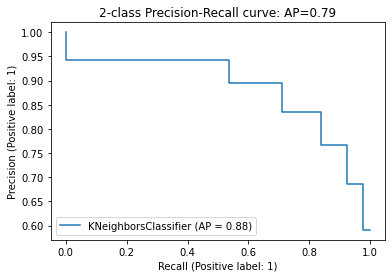

In [251]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, knn_pred)))
                     

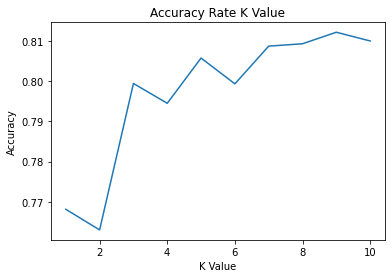

Nilai K terbaik adalah  9
Akurasi sebesar 81 %


In [252]:
# Mencari nilai K terbaik
from sklearn.model_selection import cross_val_score
accuracies = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), accuracies)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
print("Nilai K terbaik adalah ", accuracies.index(max(accuracies))+1)
print("Akurasi sebesar", round(max(accuracies)*100), "%")

# Hyperparameter Tuning


Berdasarkan model yang telah dibuat, maka akan dilakukan hyperparameter tuning untuk meningkatkan performa model. Model yang akan dilakukan hyperparameter tuning adalah Model Decision Tree.

In [277]:
# Hyperparameter Tuning (Decision Tree)
from sklearn.model_selection import GridSearchCV
param_dt = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 25), 'min_samples_leaf': np.arange(1, 25)}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_dt.fit(X_train, y_train)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy', verbose=1)

In [278]:
pred_dt = grid_dt.predict(X_test)

In [306]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4148
           1       1.00      1.00      1.00      5993

    accuracy                           1.00     10141
   macro avg       1.00      1.00      1.00     10141
weighted avg       1.00      1.00      1.00     10141



In [307]:
# Hasil Hyperparameter Tuning (Decision Tree)
print('Best Score: ', grid_dt.best_score_)
print('Best Params: ', grid_dt.best_params_)
print('Best Estimator: ', grid_dt.best_estimator_)
print('Best Index: ', grid_dt.best_index_)

# Akurasi Decision Tree
print('Akurasi Decision Tree    : ',grid_dt.score(X_test, y_test))
# Recall Decision Tree
print('Recall Decision Tree     : ',recall_score(y_test, pred_dt))
# Precision Decision Tree
print('Precision Decision Tree  : ',precision_score(y_test, pred_dt))
# F1 Decision Tree
print('F1 Decision Tree         : ',f1_score(y_test, pred_dt))
# MAE
print('MAE Decision Tree        : ',mean_absolute_error(y_test, pred_dt))
# ROC AUC
print('ROC AUC Decision Tree    : ',roc_auc_score(y_test, pred_dt))

Best Score:  1.0
Best Params:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=7)
Best Index:  720
Akurasi Decision Tree    :  1.0
Recall Decision Tree     :  1.0
Precision Decision Tree  :  1.0
F1 Decision Tree         :  1.0
MAE Decision Tree        :  0.0
ROC AUC Decision Tree    :  1.0
